In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.skybrightness_pre as sb
import healpy as hp

Grab the full sky maps for a serries of mjds.

In [2]:
sm = sb.SkyModelPre()

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:255: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


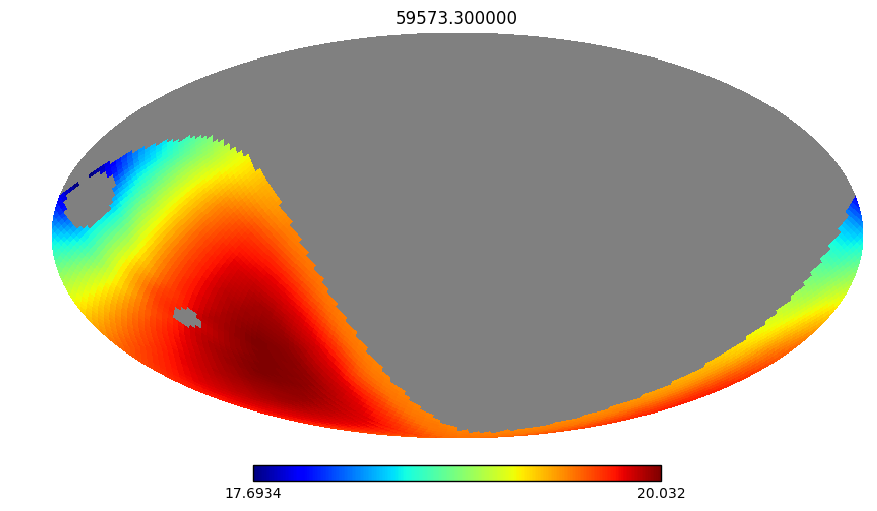

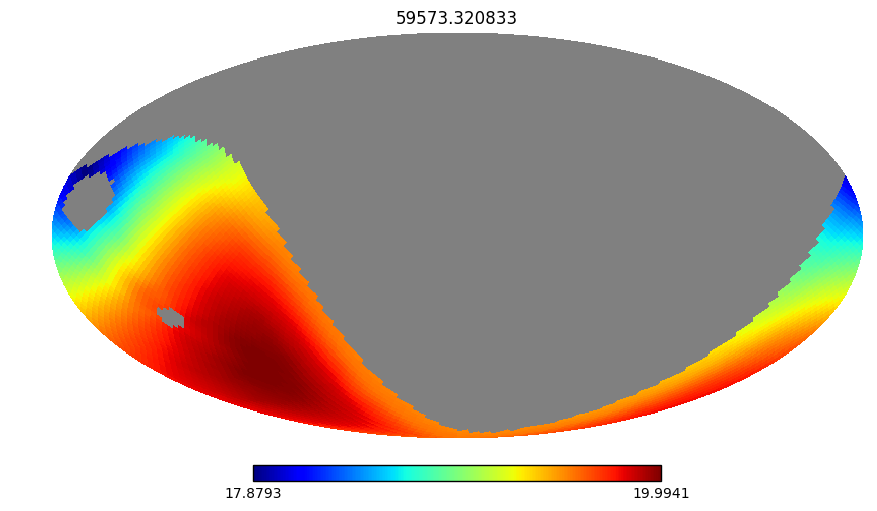

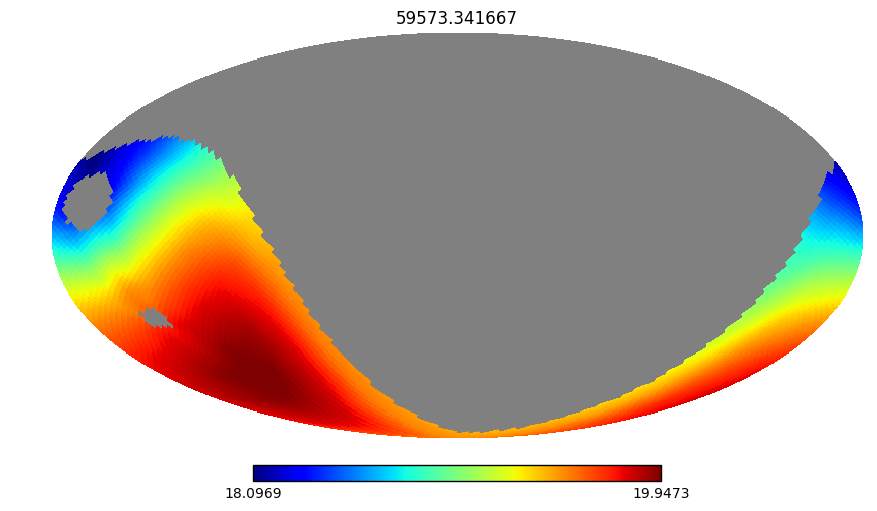

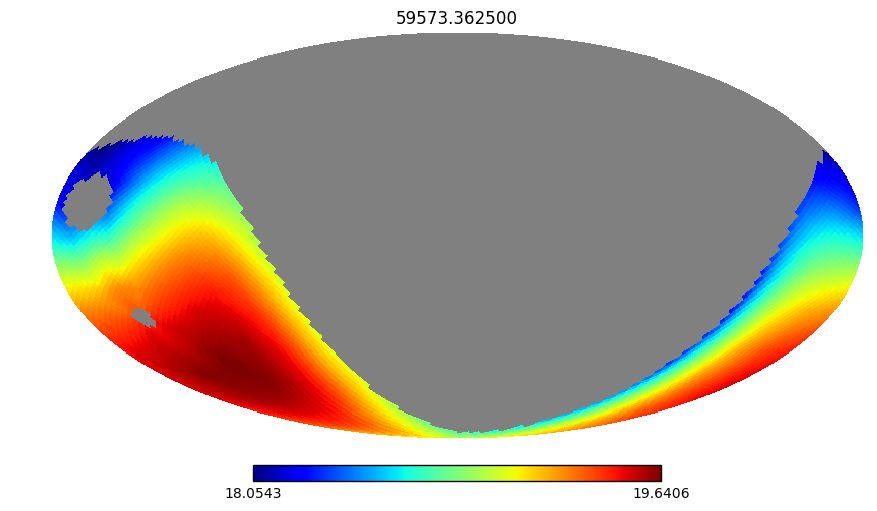

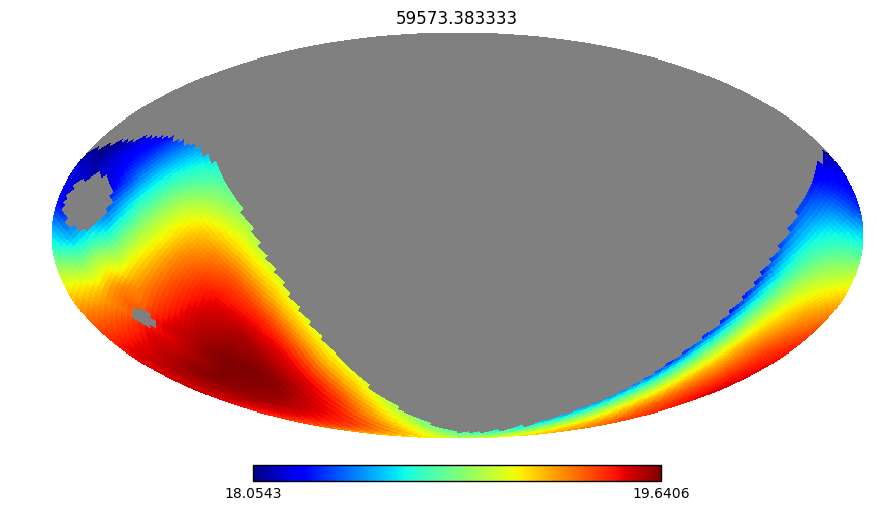

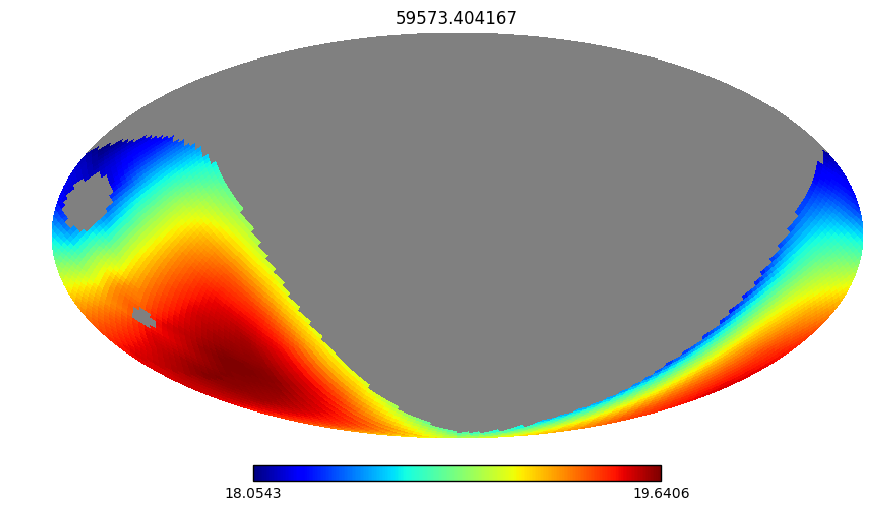

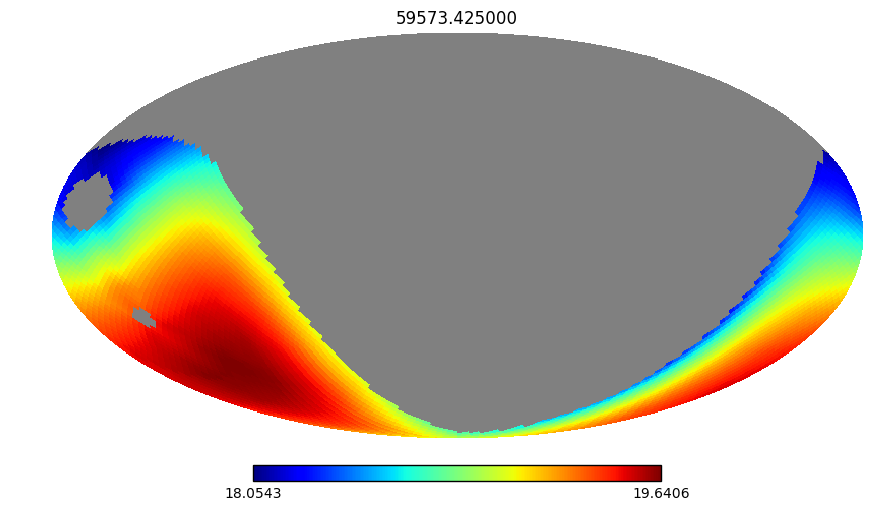

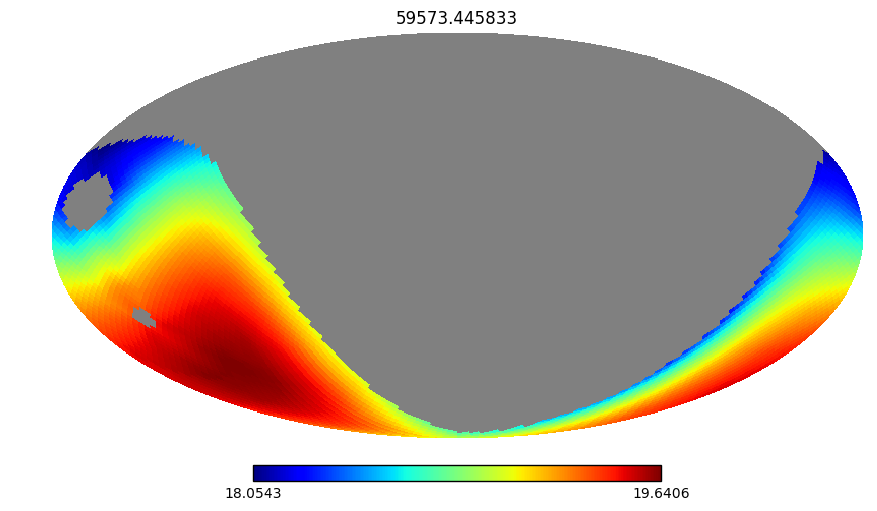

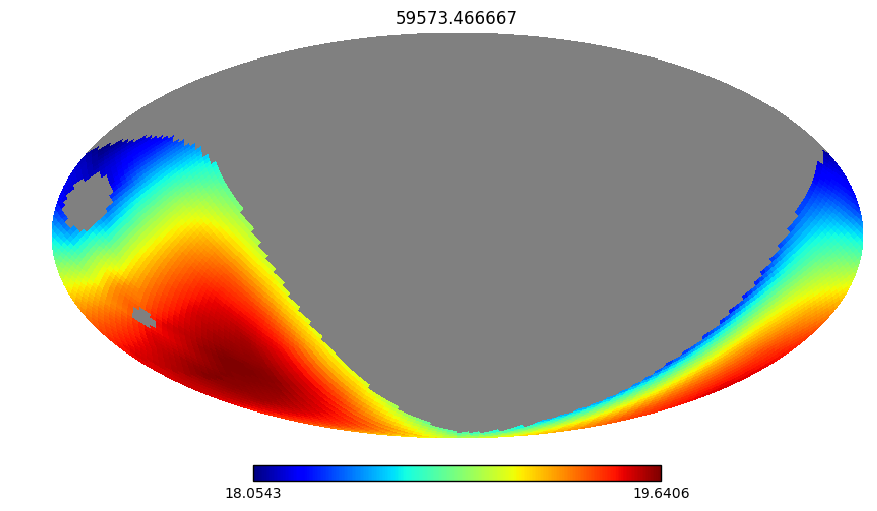

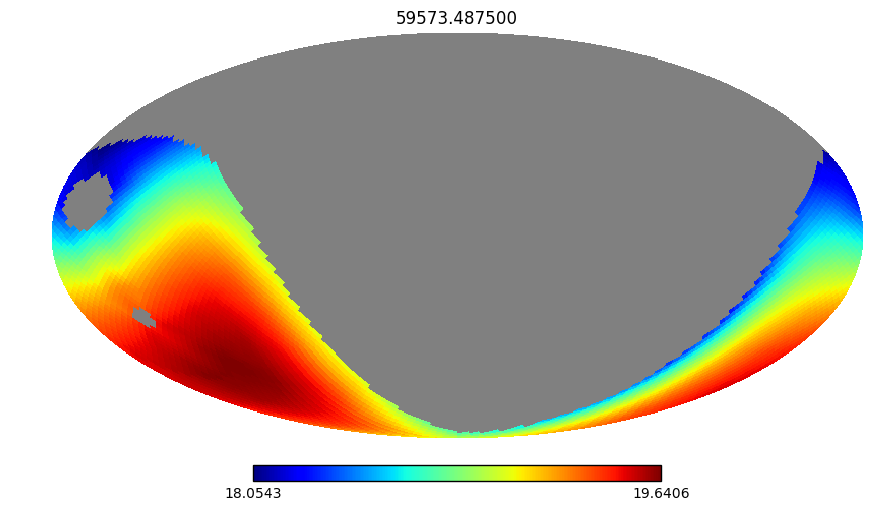

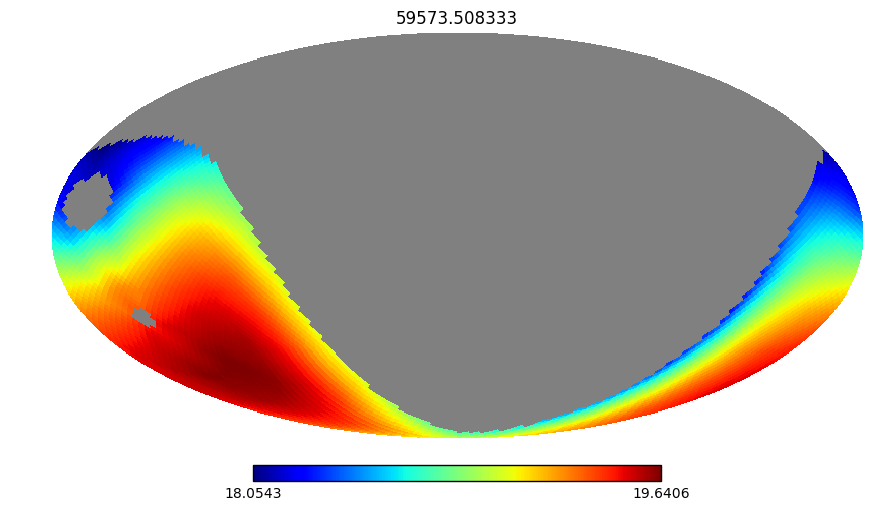

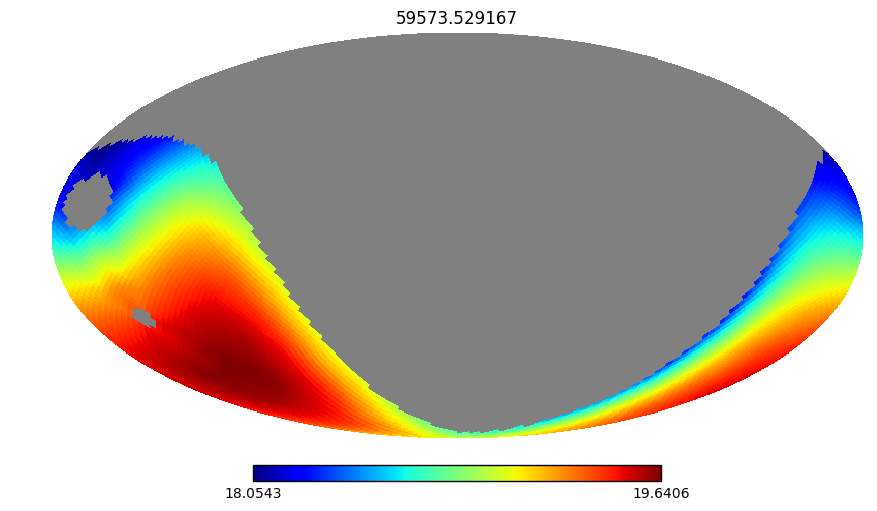

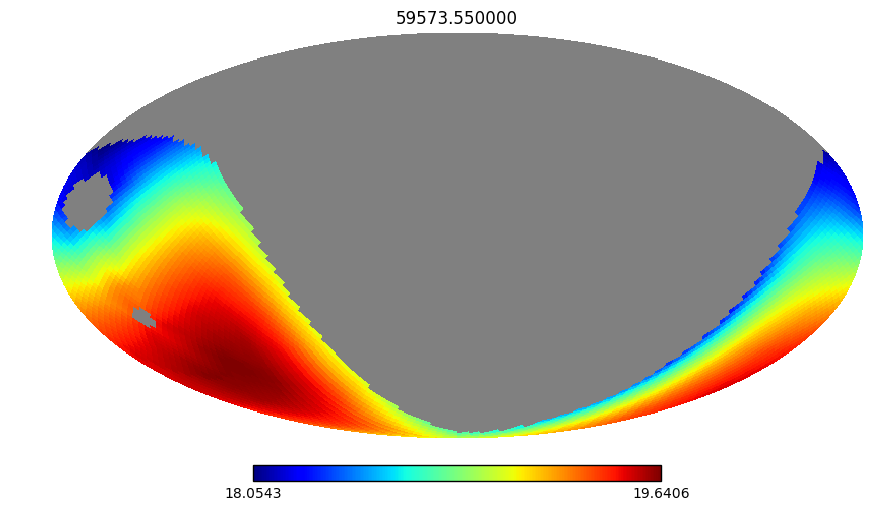

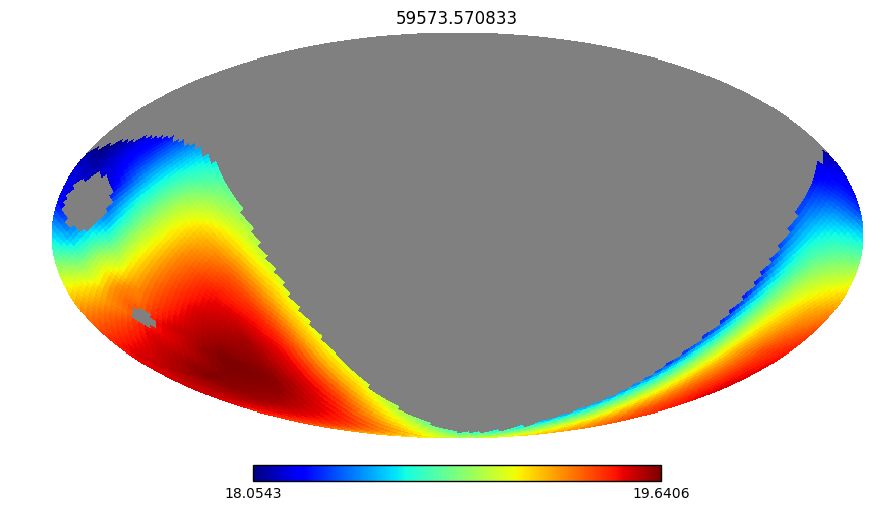

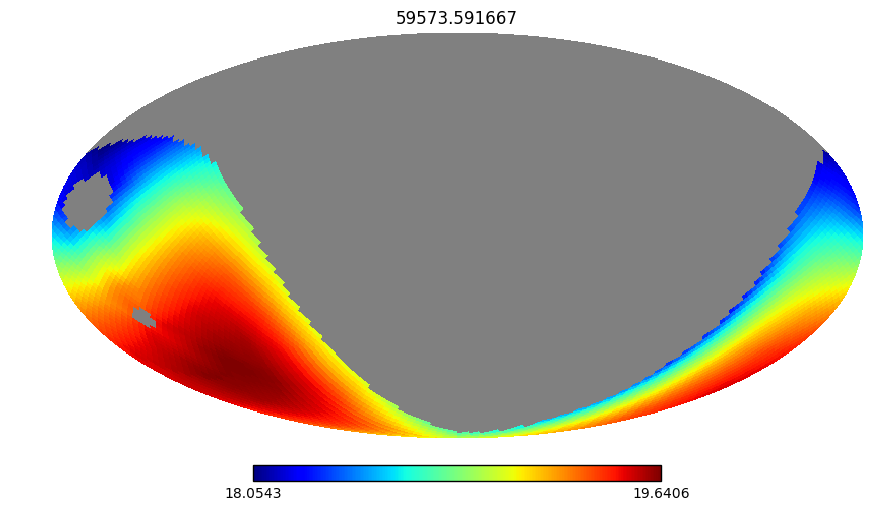

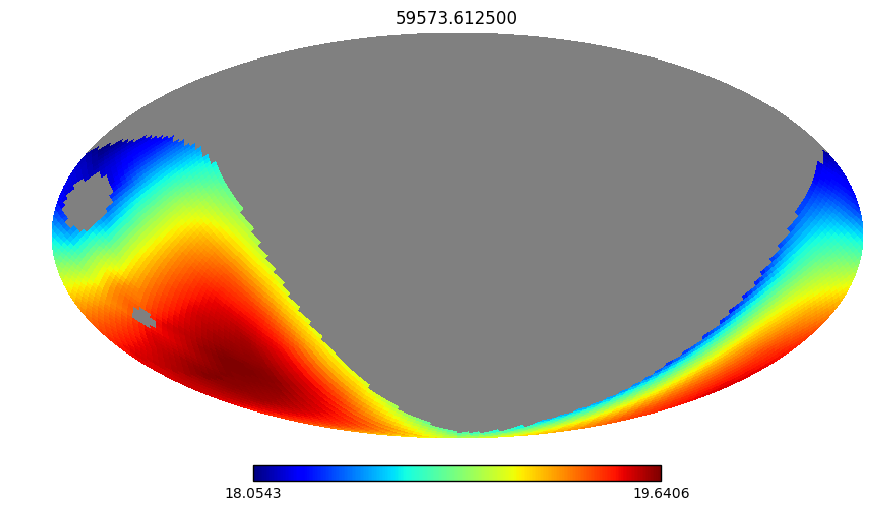

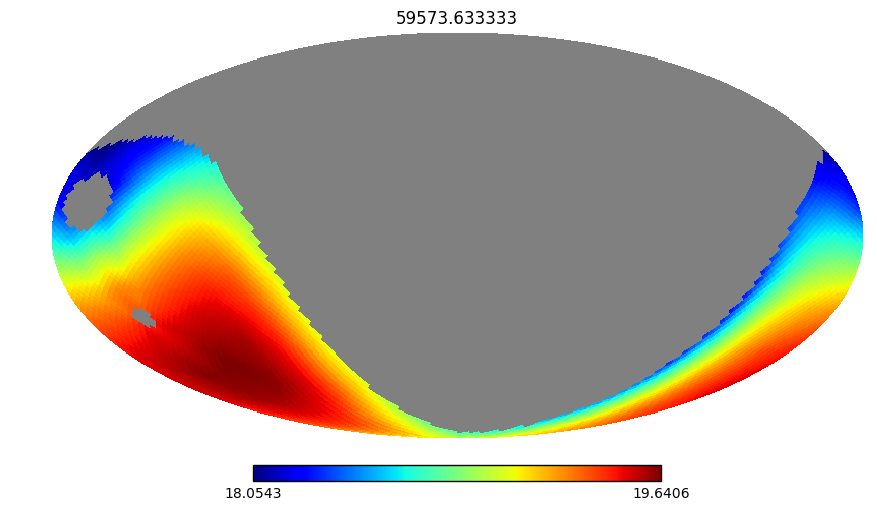

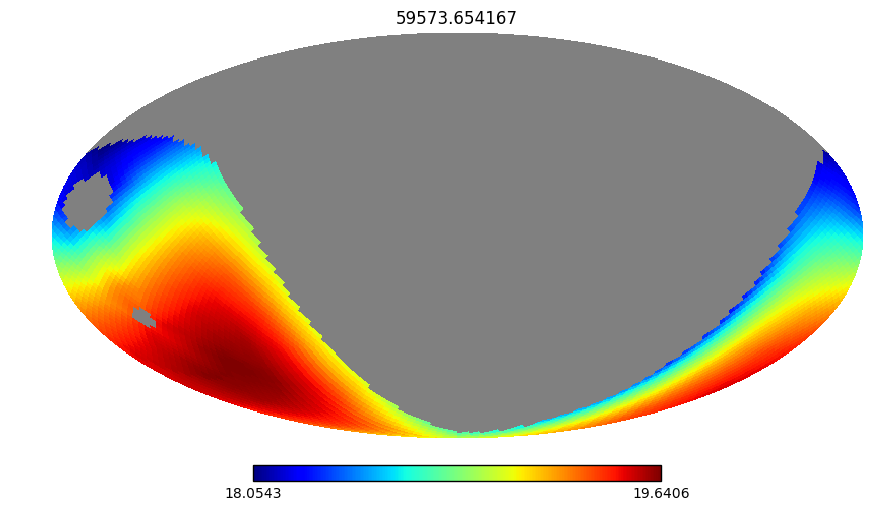

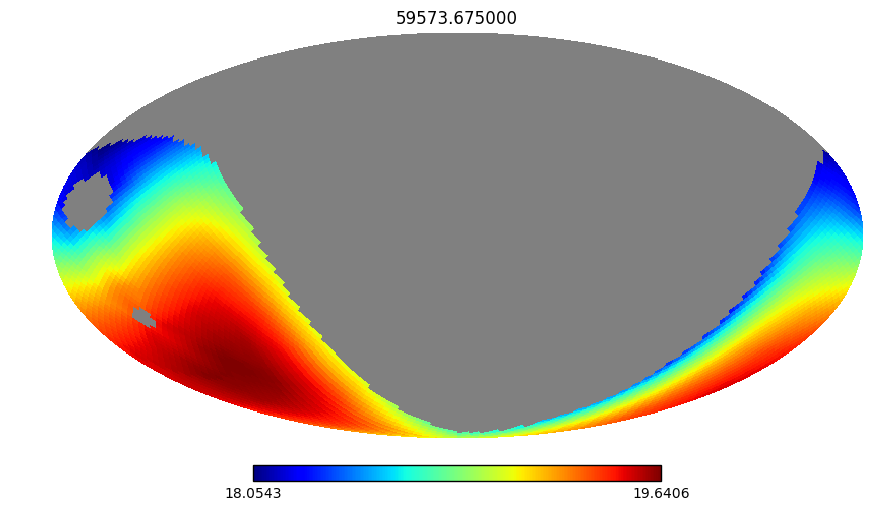

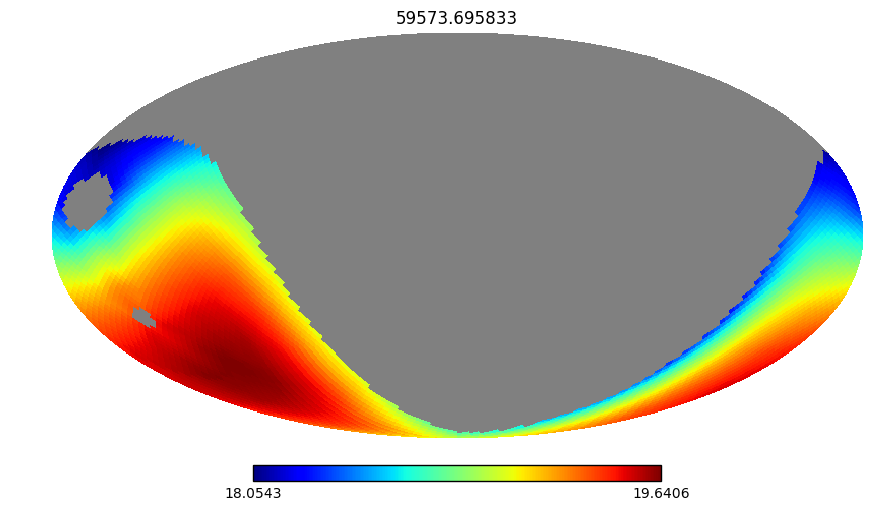

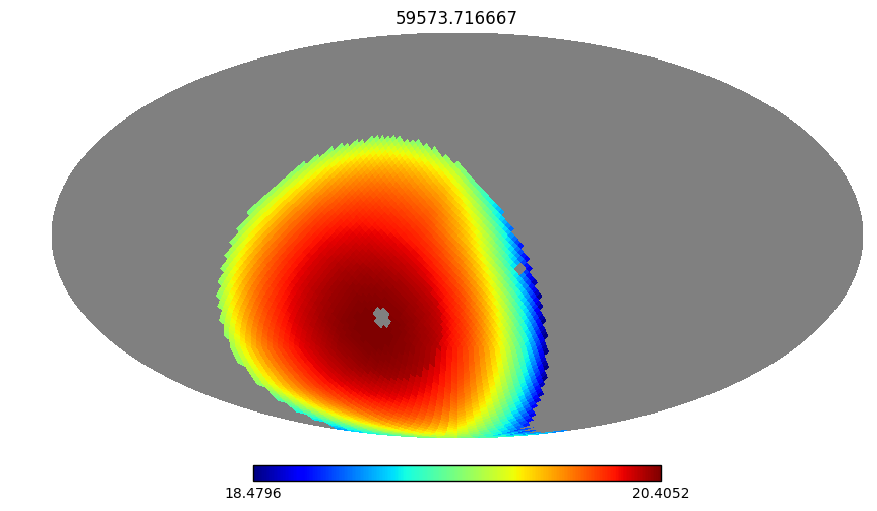

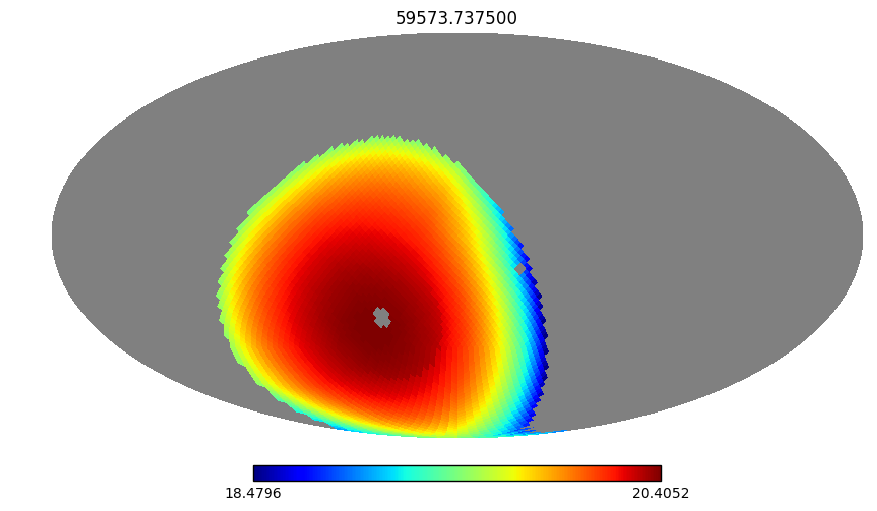

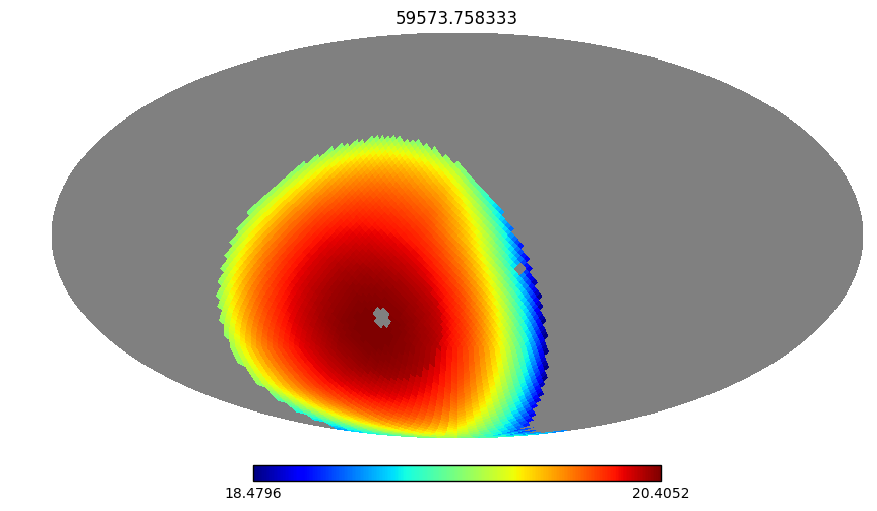

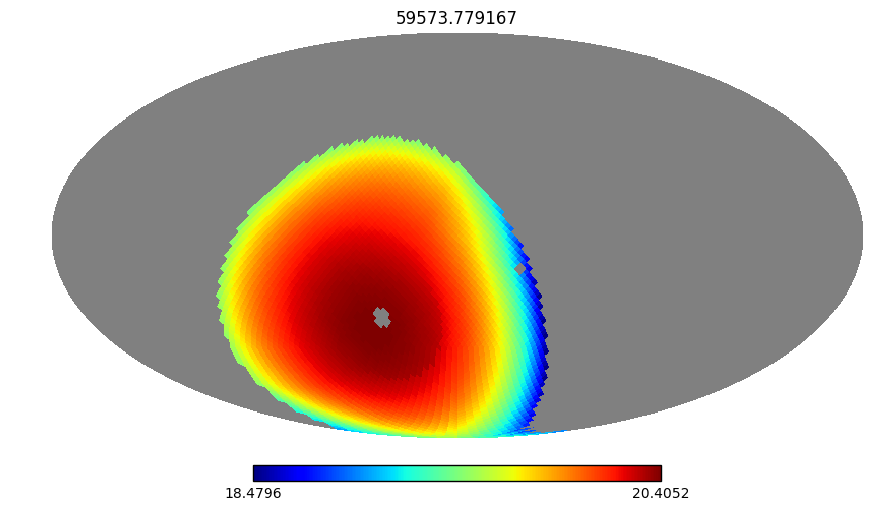

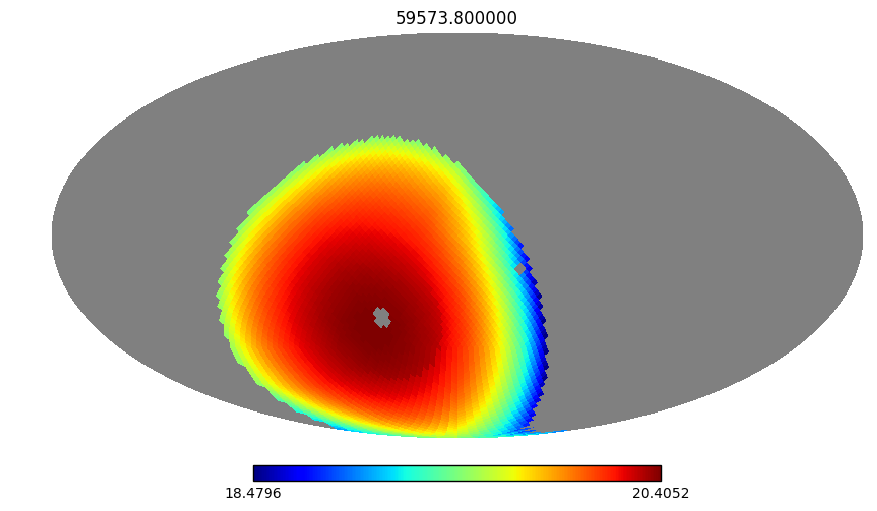

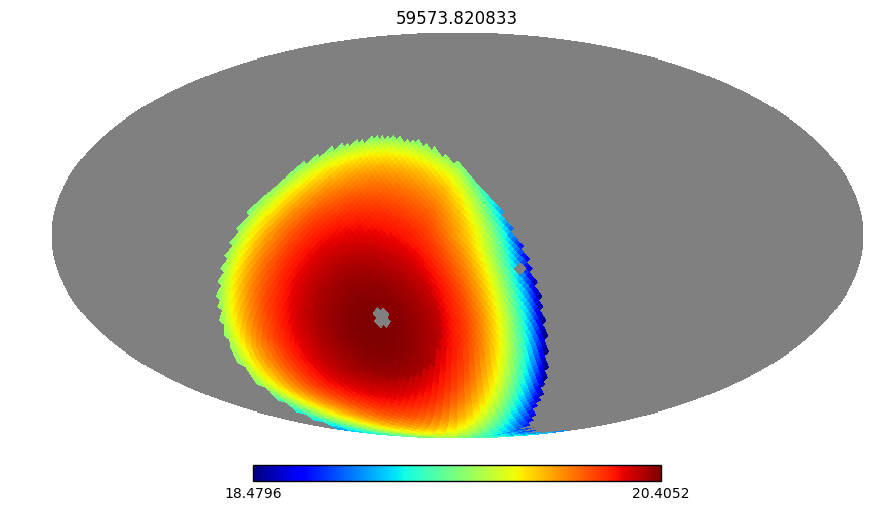

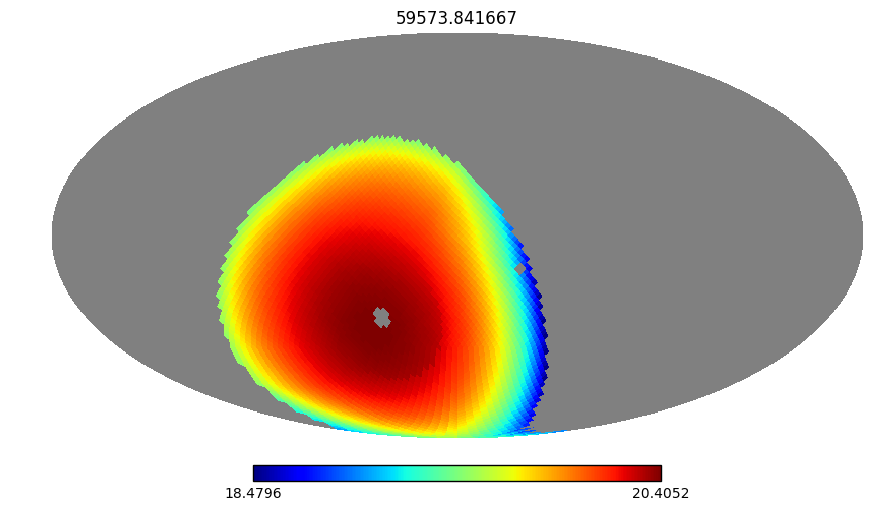

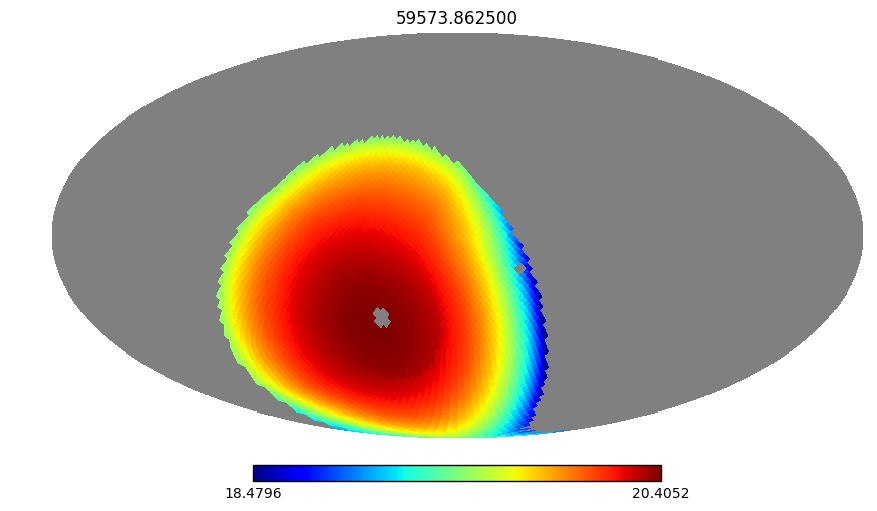

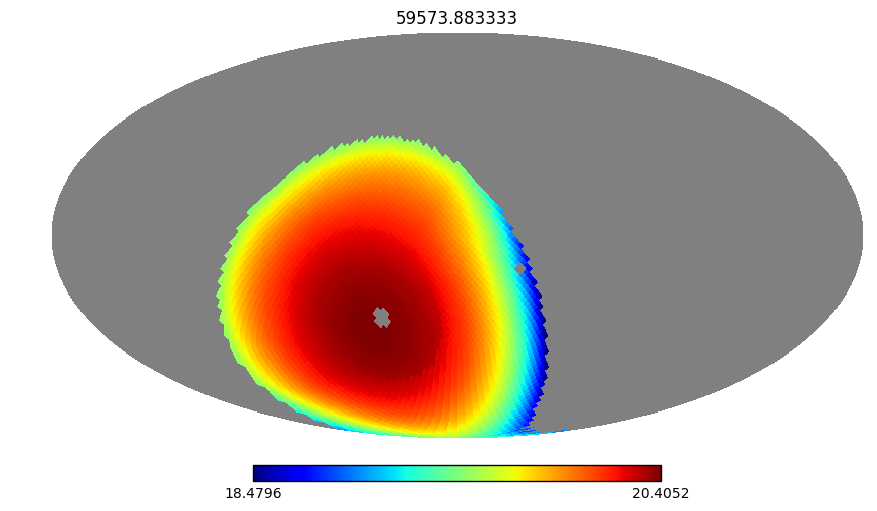

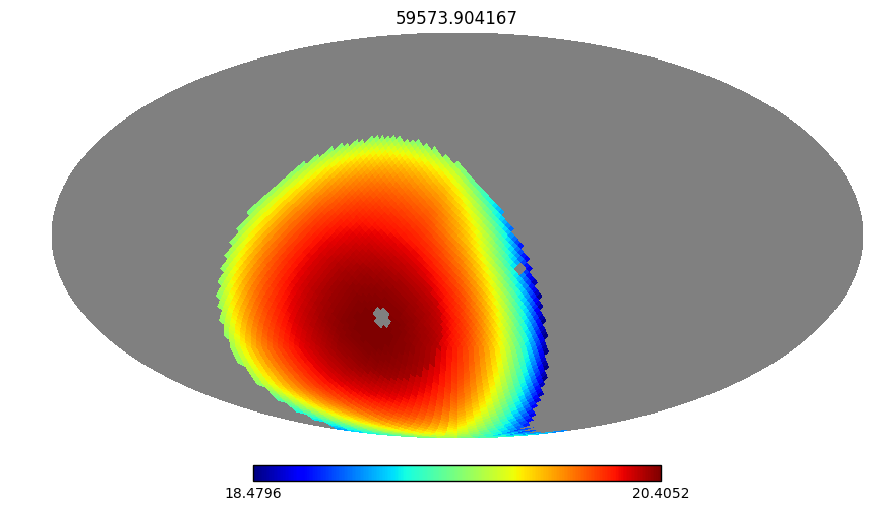

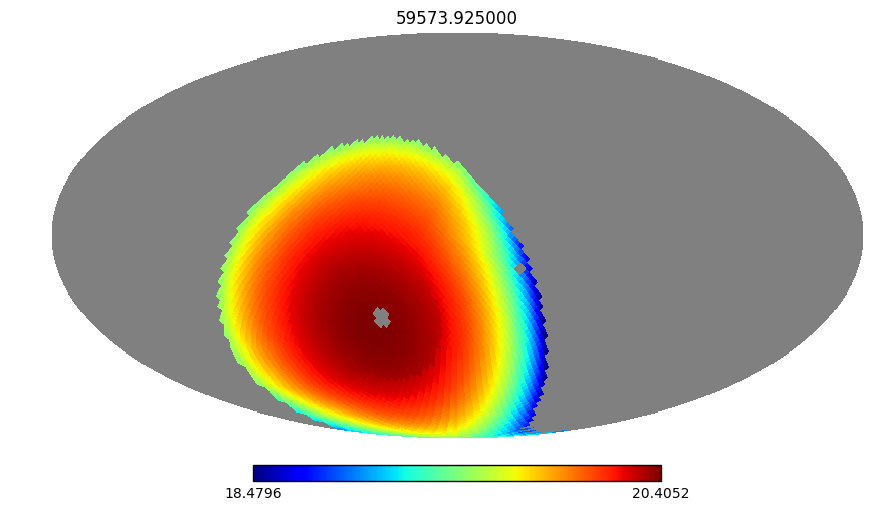

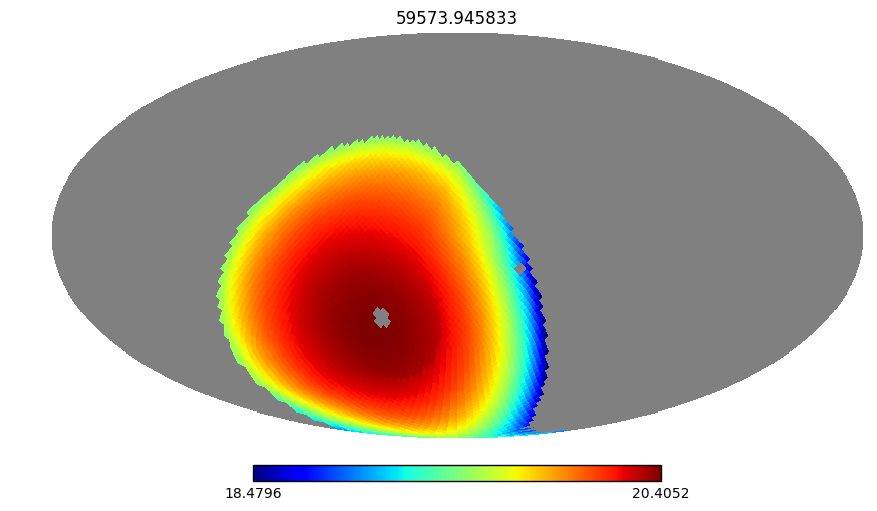

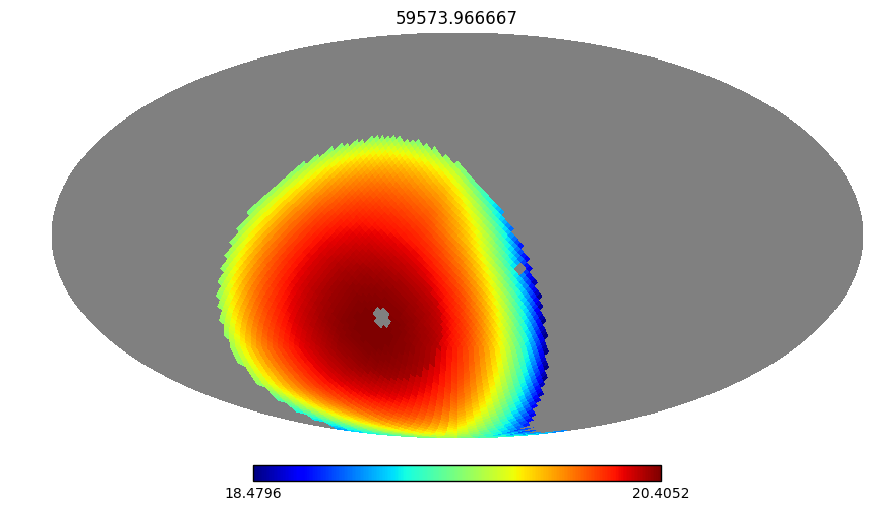

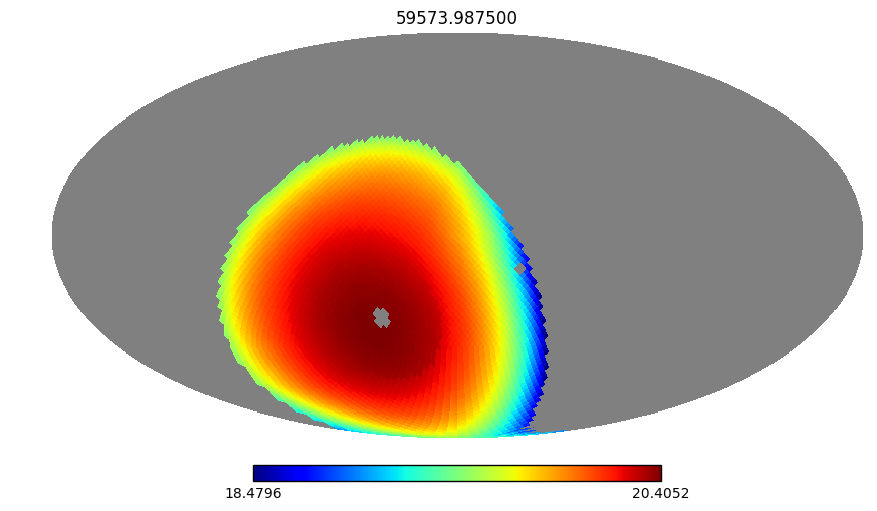

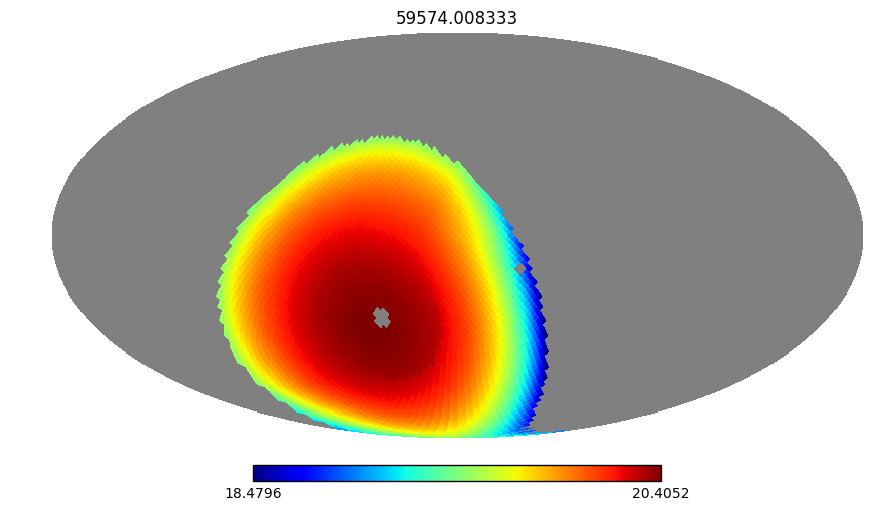

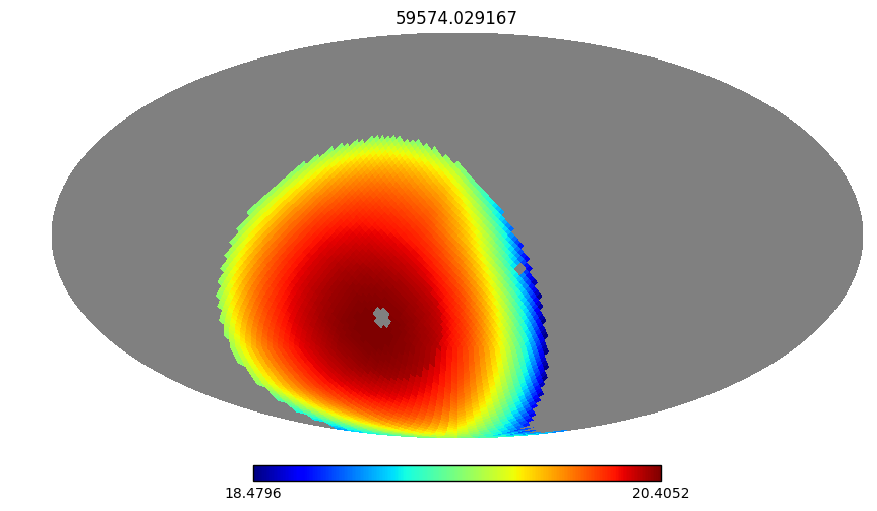

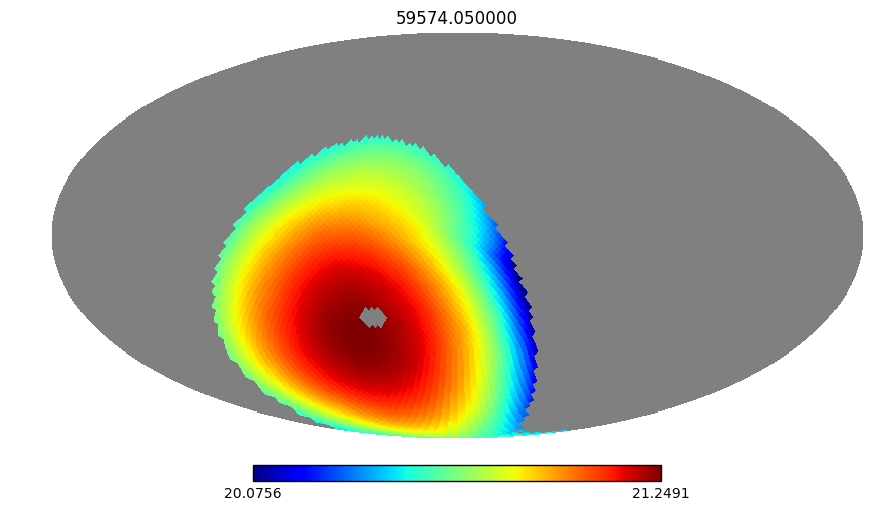

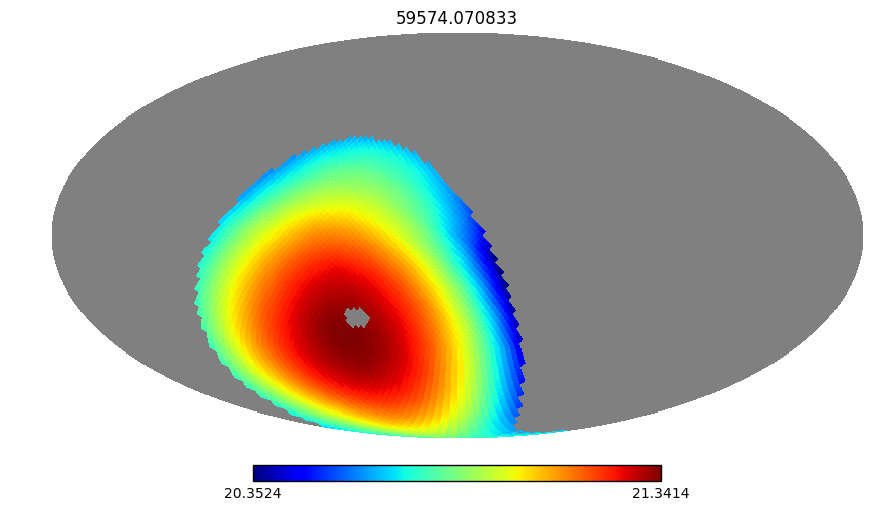

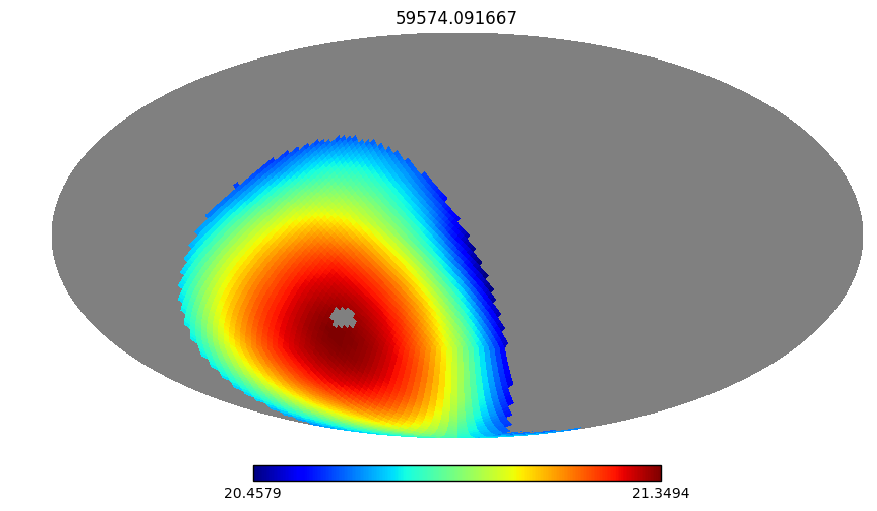

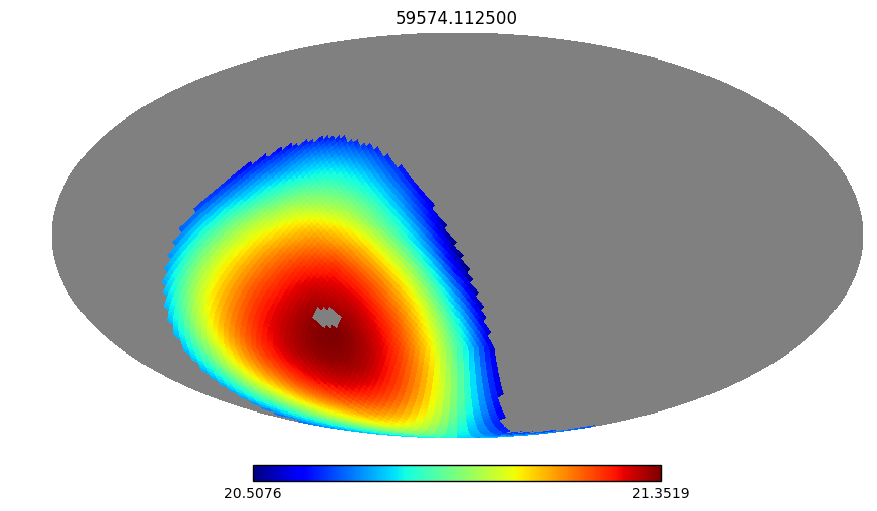

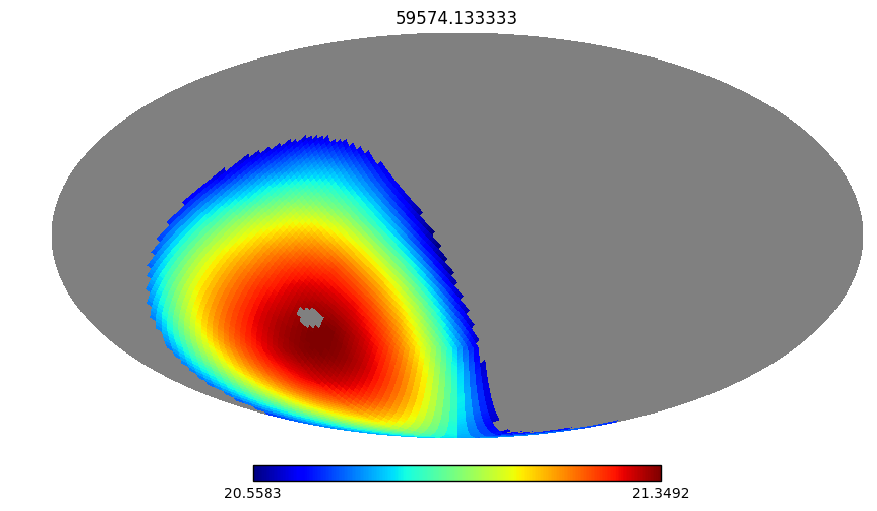

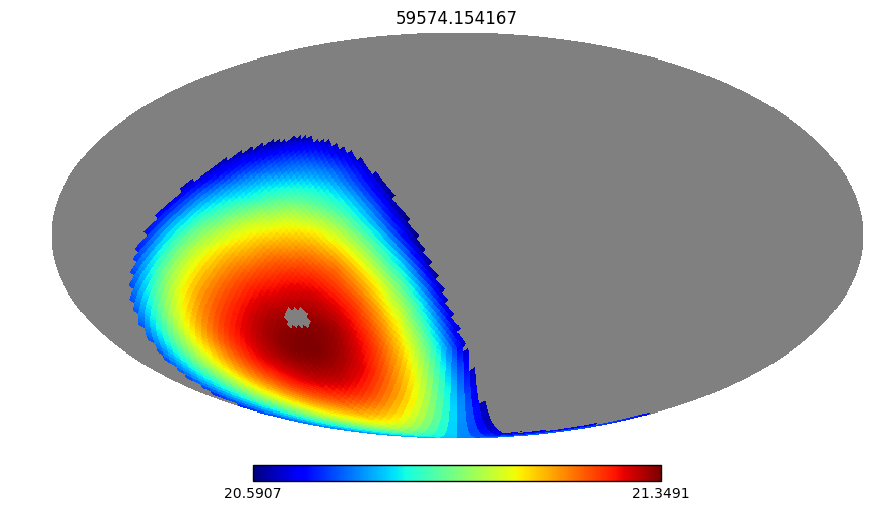

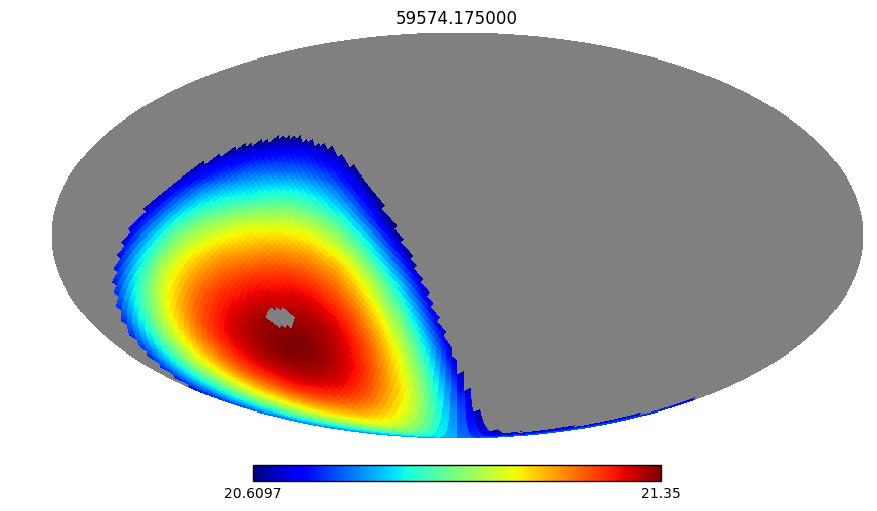

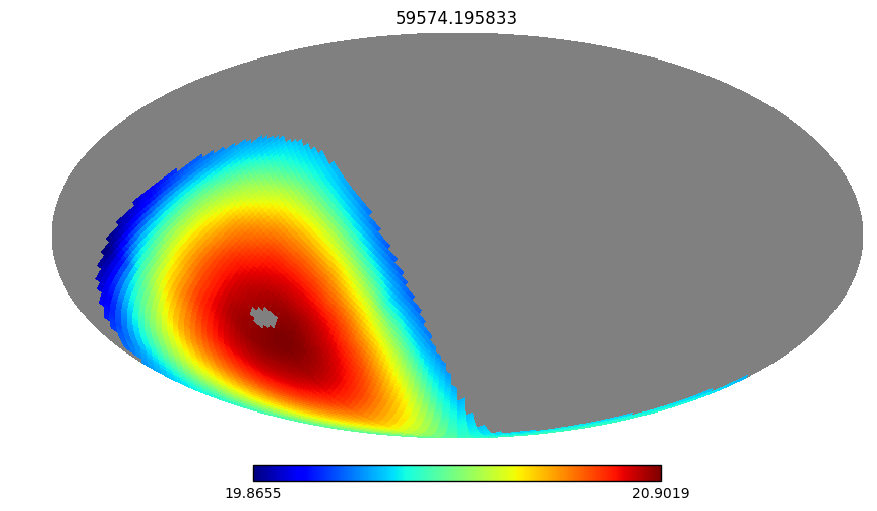

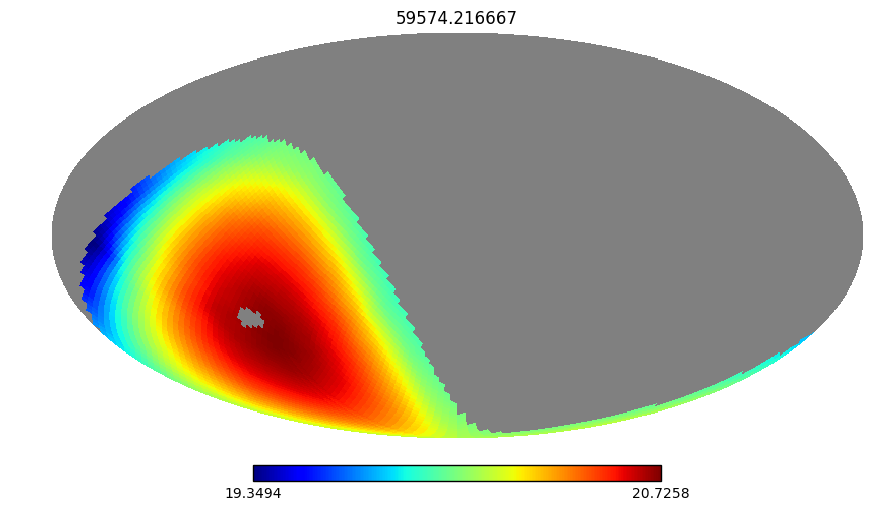

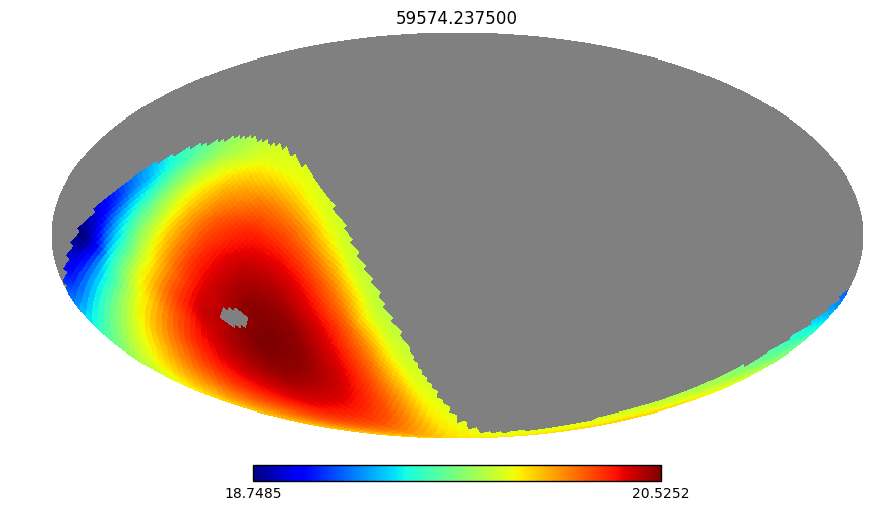

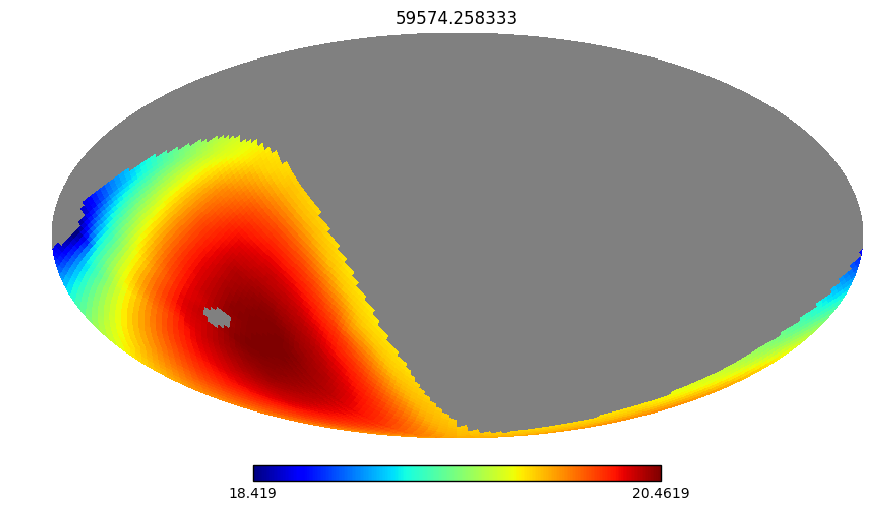

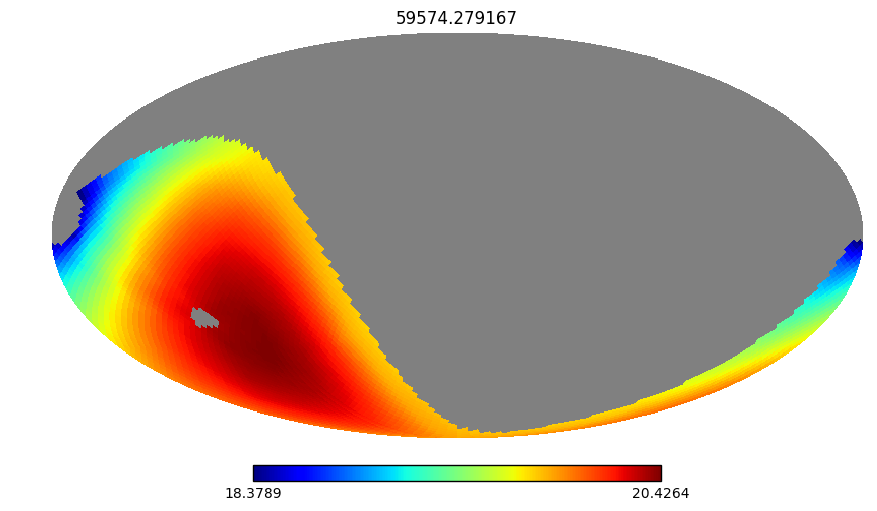

In [3]:
step = 30. /60. / 24.  # 30 minute timestep
nmjd = 48
mjds = np.arange(nmjd)*step + 59573.2+0.1
for mjd in mjds:
    skymap = sm.returnMags(mjd)
    if np.max(skymap['r']) != hp.UNSEEN:
        hp.mollview(skymap['r'], title='%f' % mjd)

In [4]:
am_map = sm.returnAirmass(mjd)
good = np.where((am_map > 2.7) & (skymap['r'] != hp.UNSEEN))
print good
print am_map.shape
skymap['r'].shape

(array([], dtype=int64),)
(12288,)


(12288,)

Only grab a single healpixel ID at multiple mjds

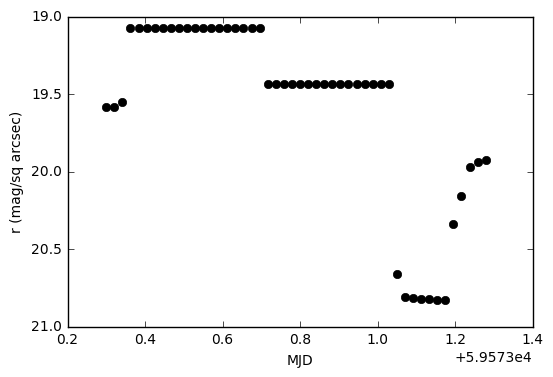

In [5]:
point_mags=[]
for mjd in mjds:
    point_mags.append(sm.returnMags(mjd, indx=[12285])['r'])
point_mags = np.array(point_mags)
good = np.where(point_mags != hp.UNSEEN)[0]
plt.plot(mjds[good], point_mags[good], 'ko')
plt.xlabel('MJD')
plt.ylabel('r (mag/sq arcsec)')
plt.gca().invert_yaxis()

Now let's look at the airmass maps

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:172: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')


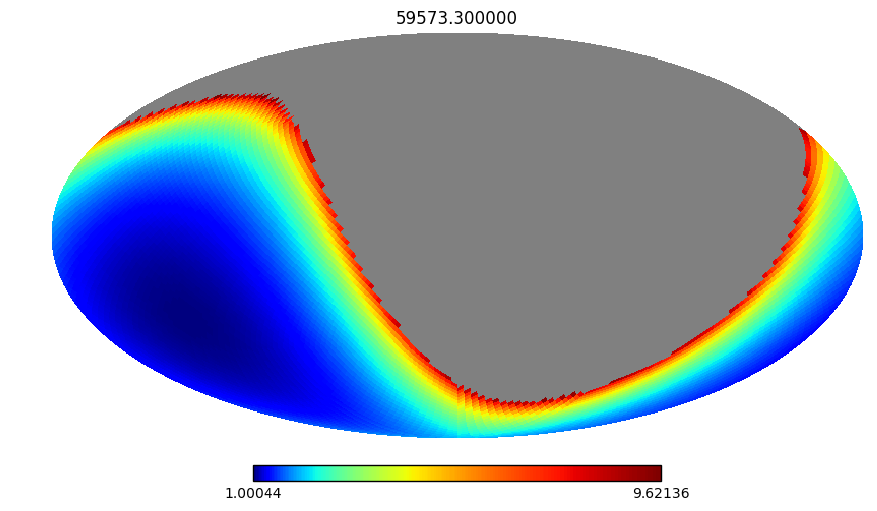

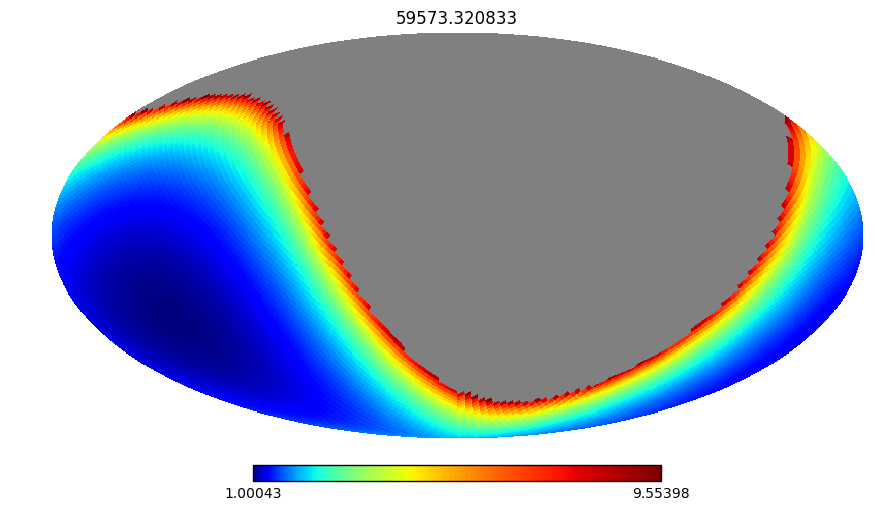

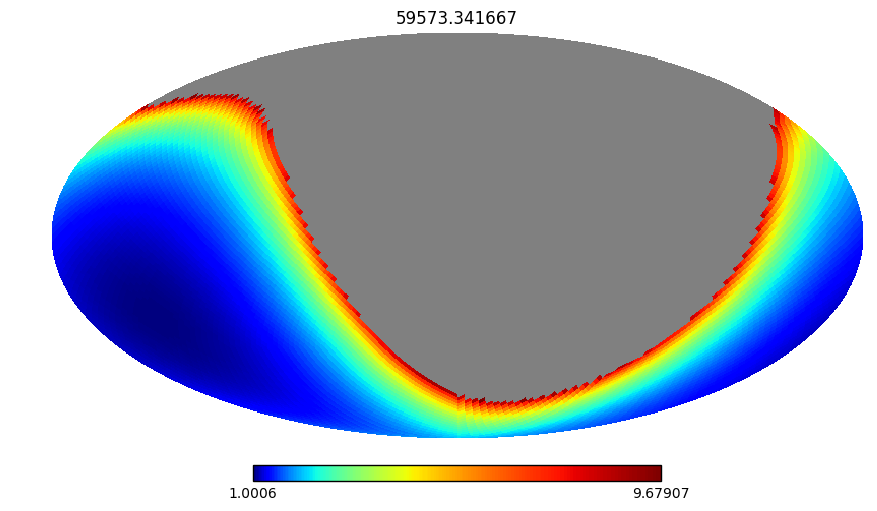

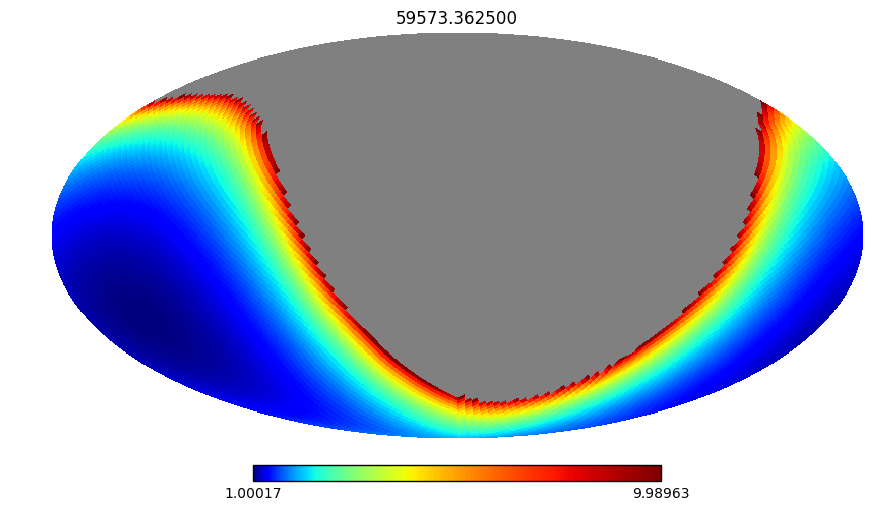

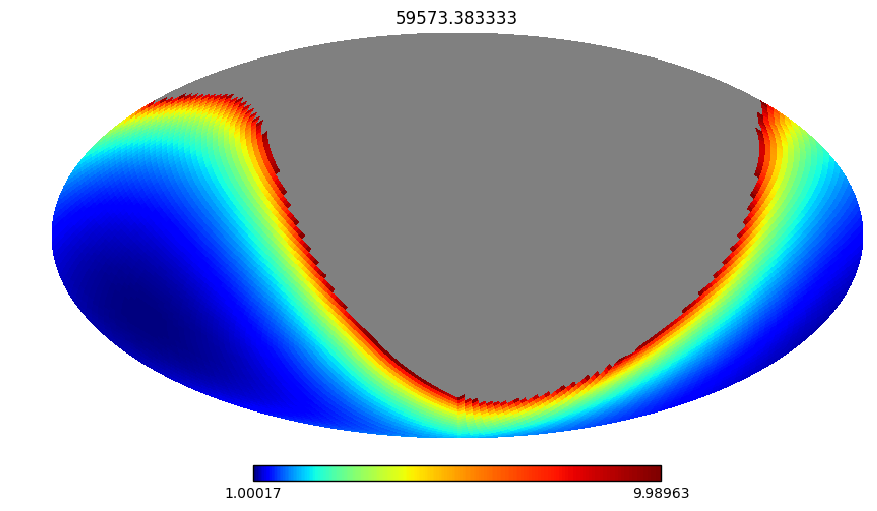

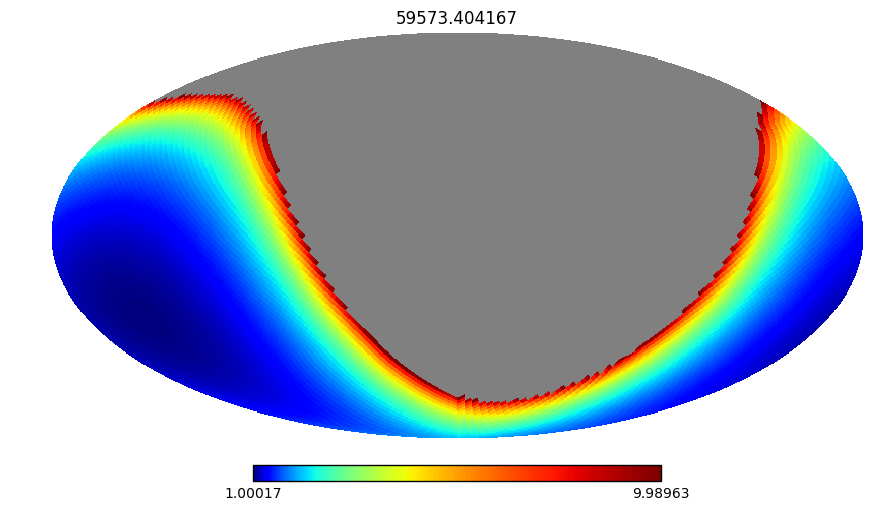

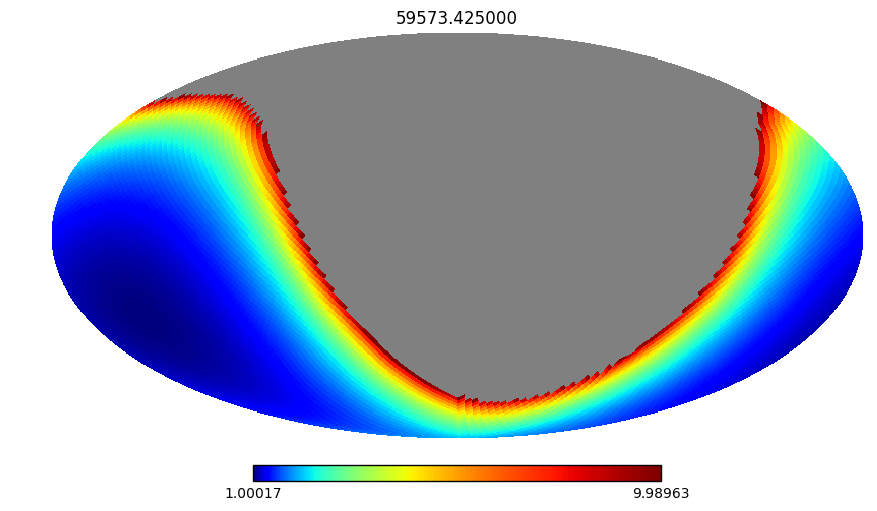

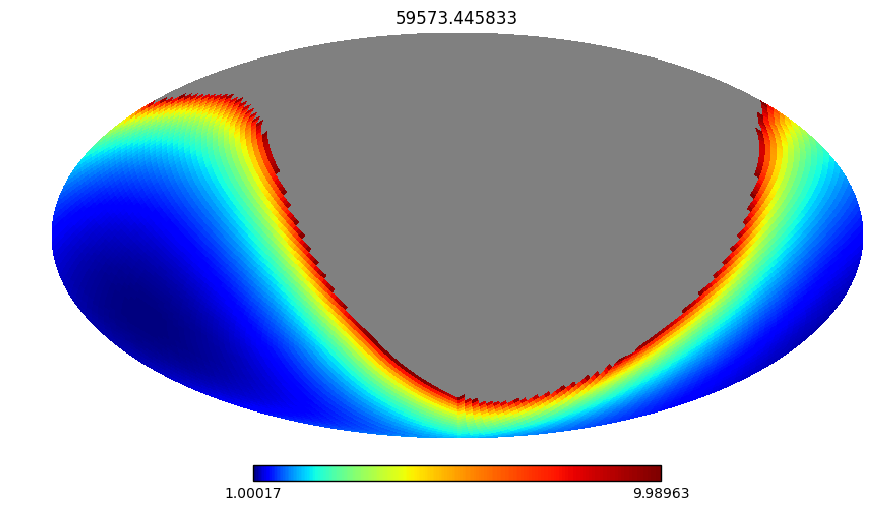

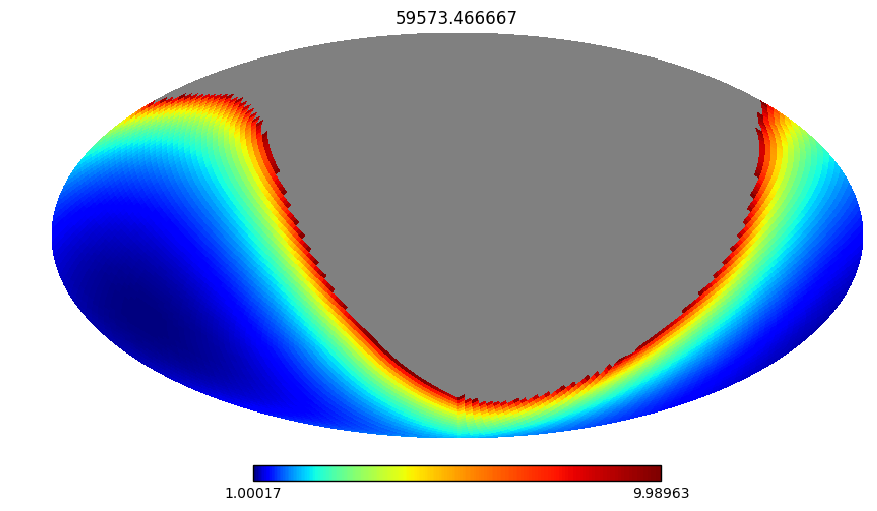

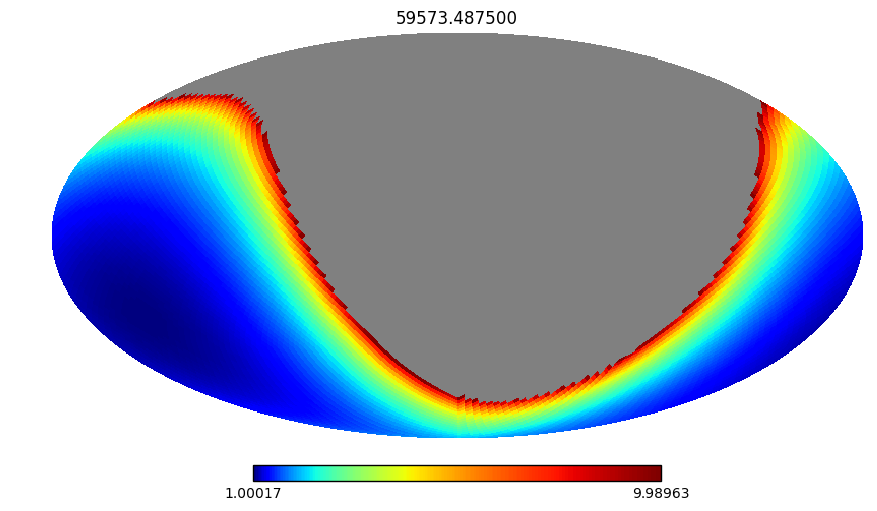

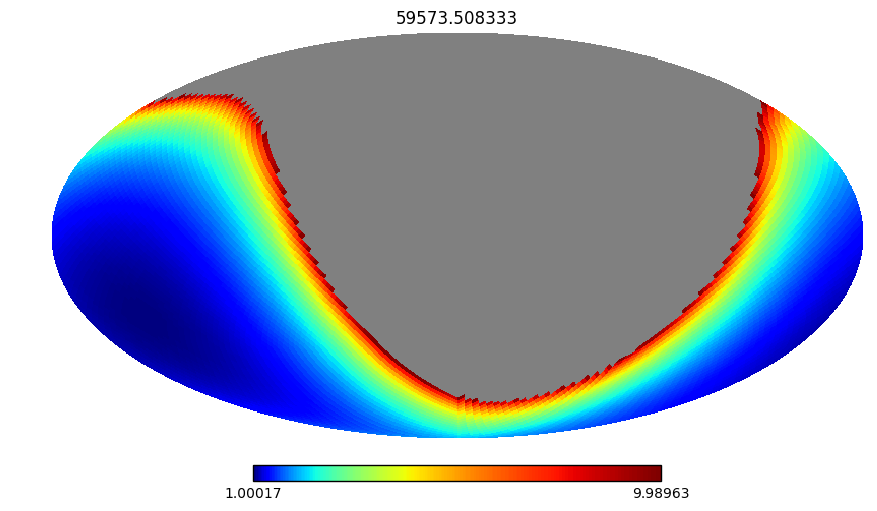

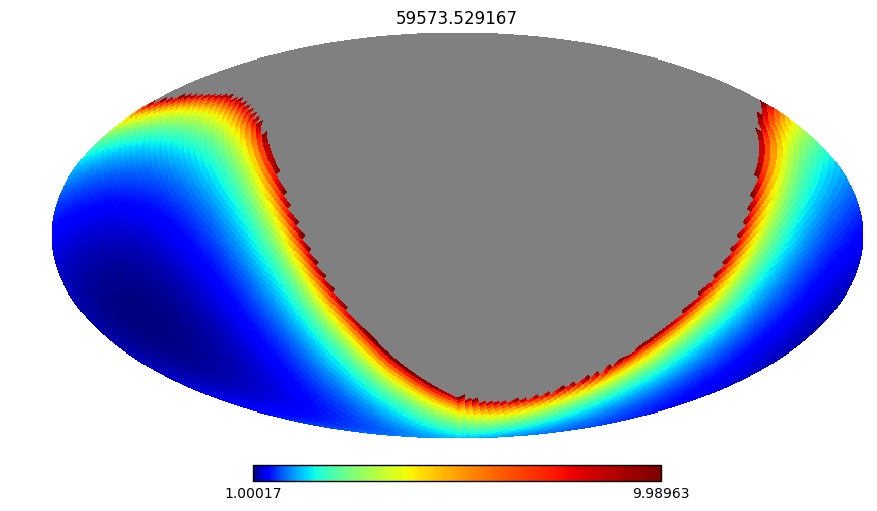

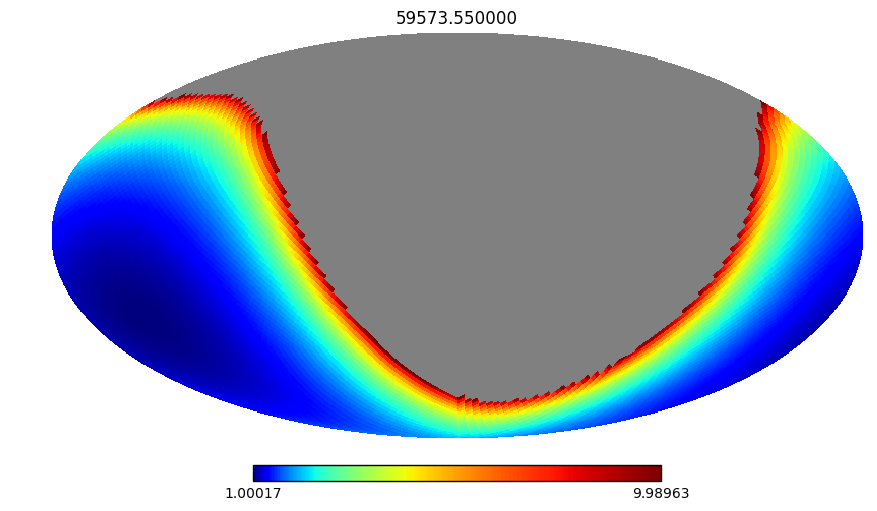

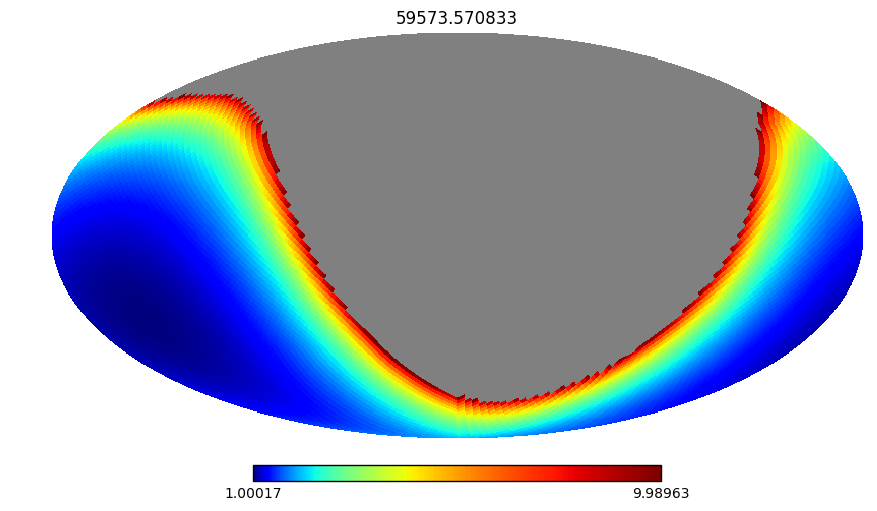

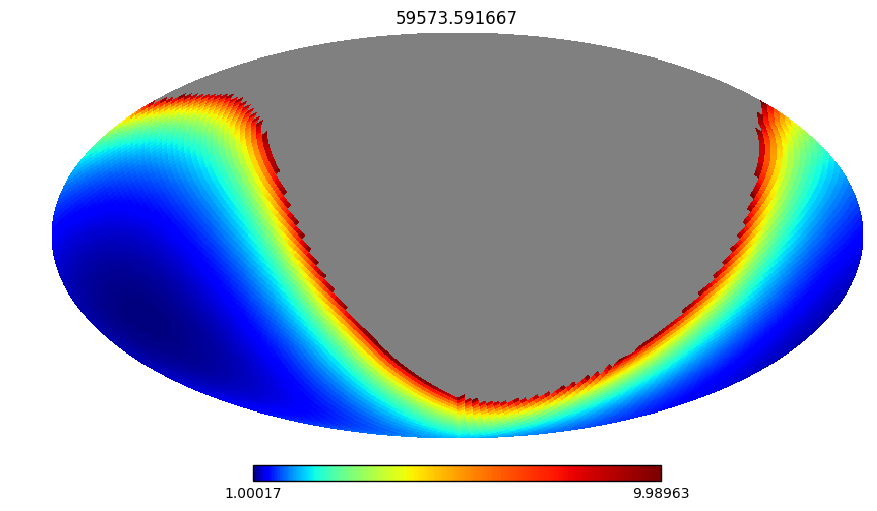

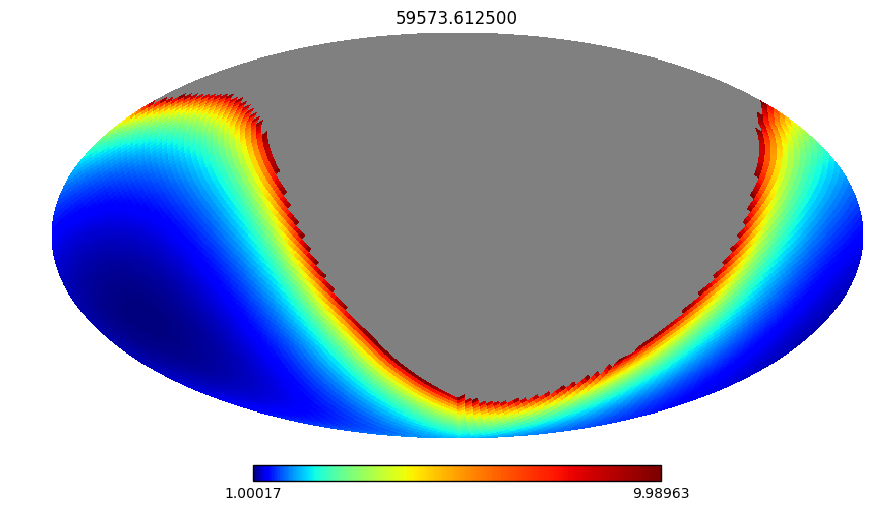

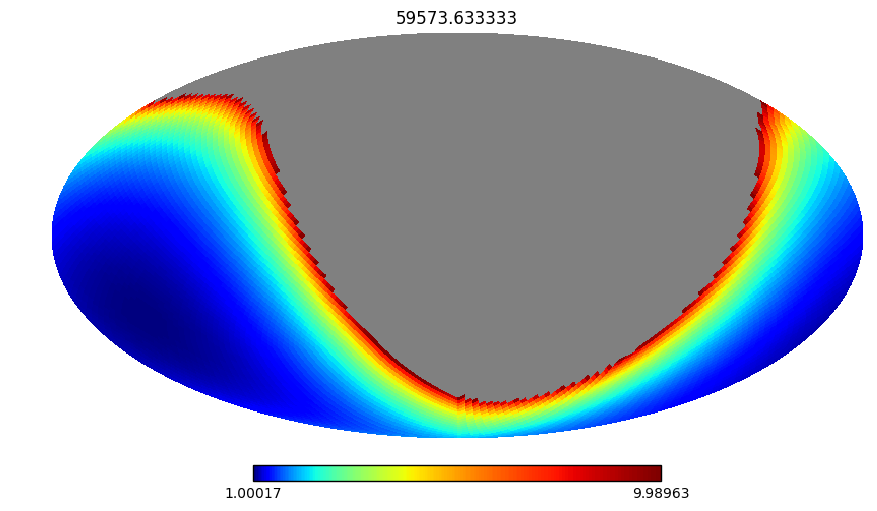

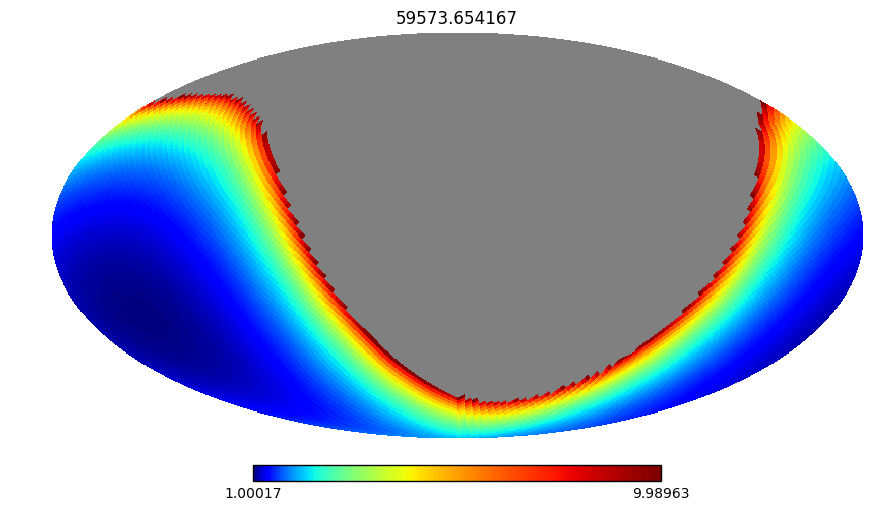

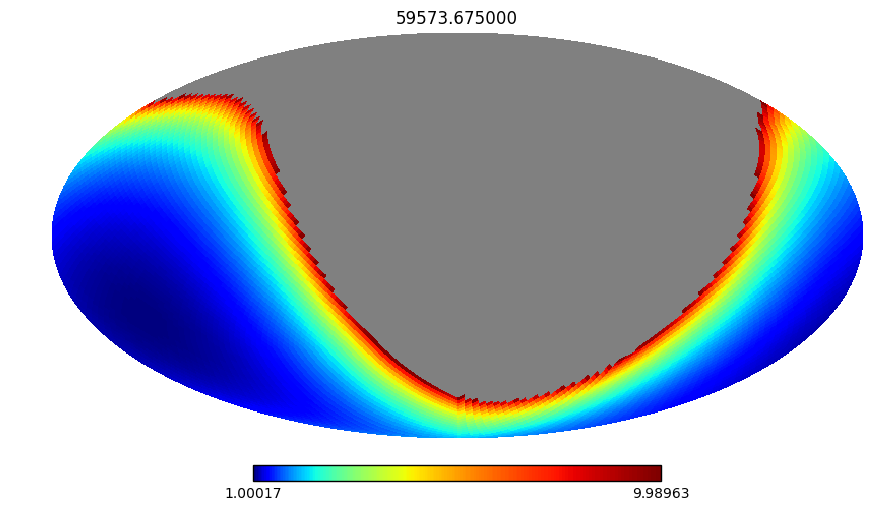

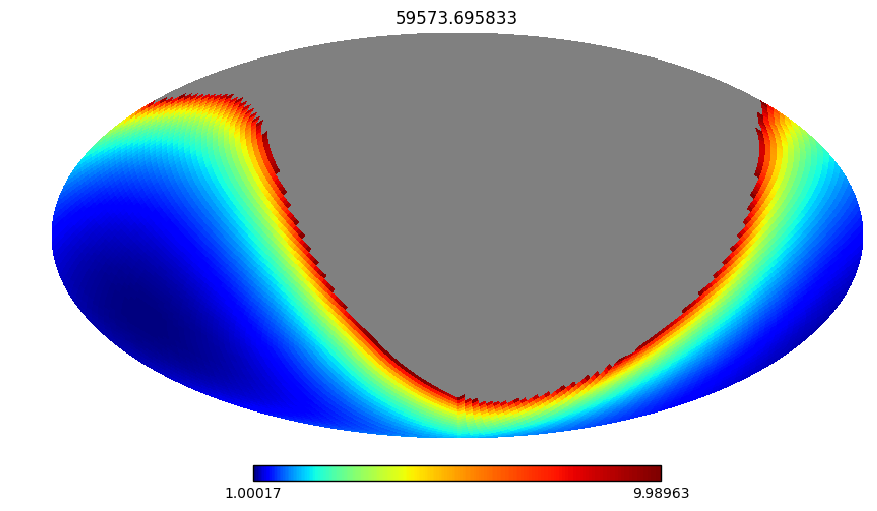

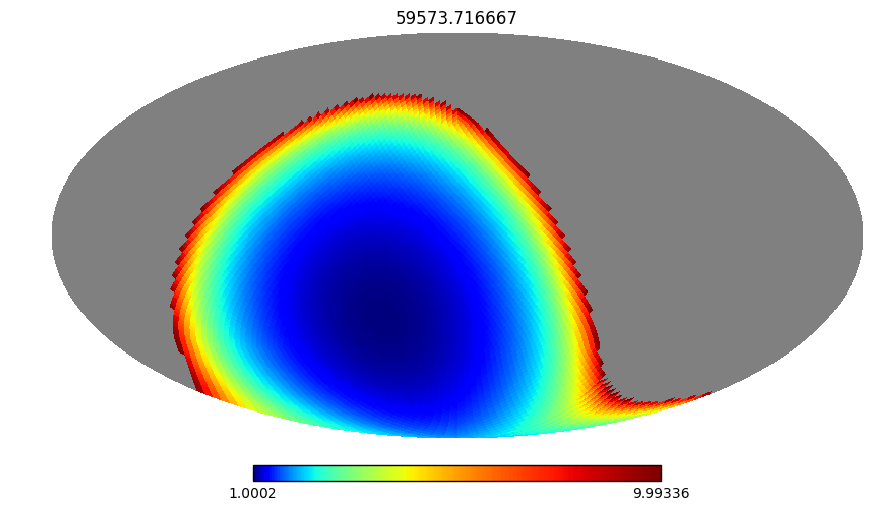

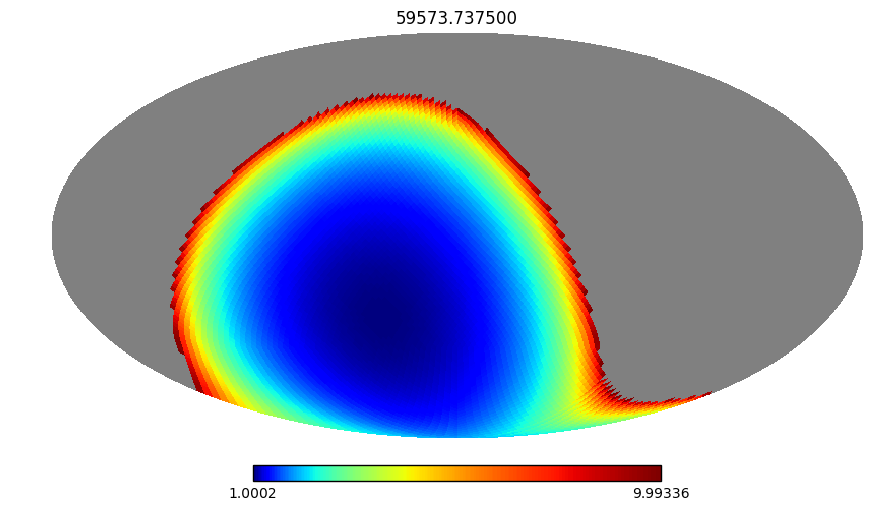

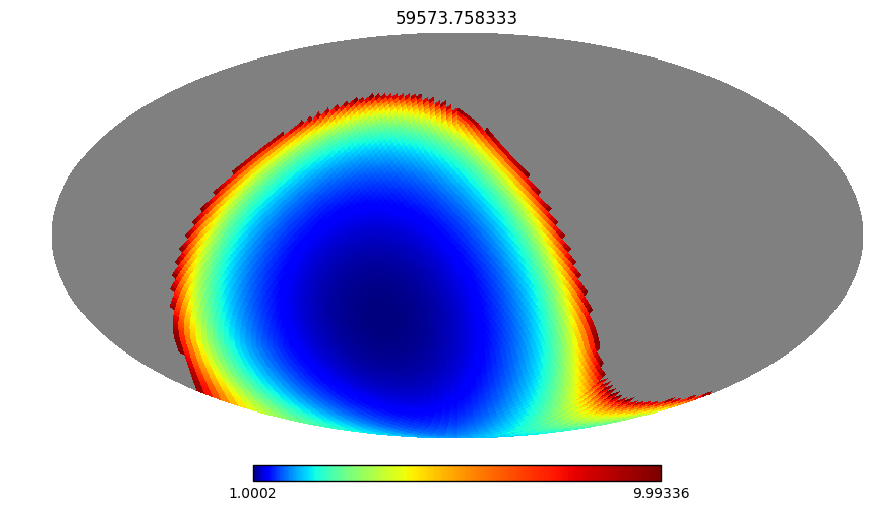

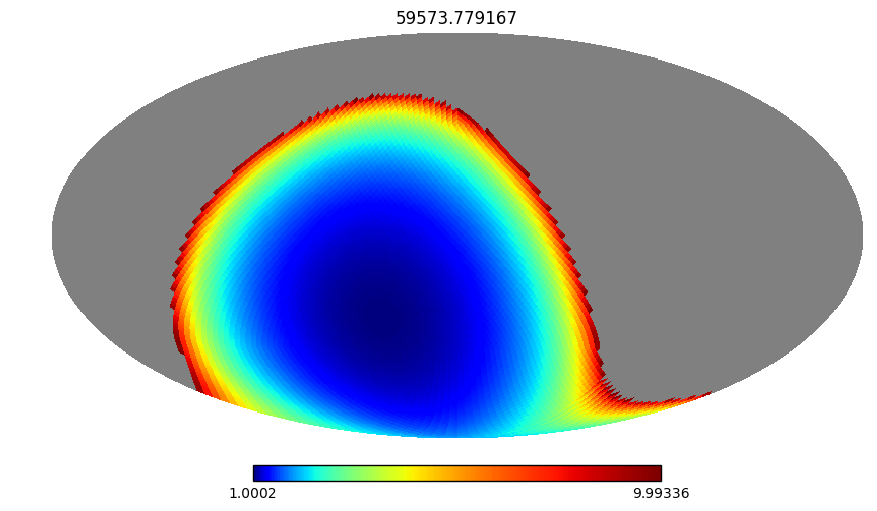

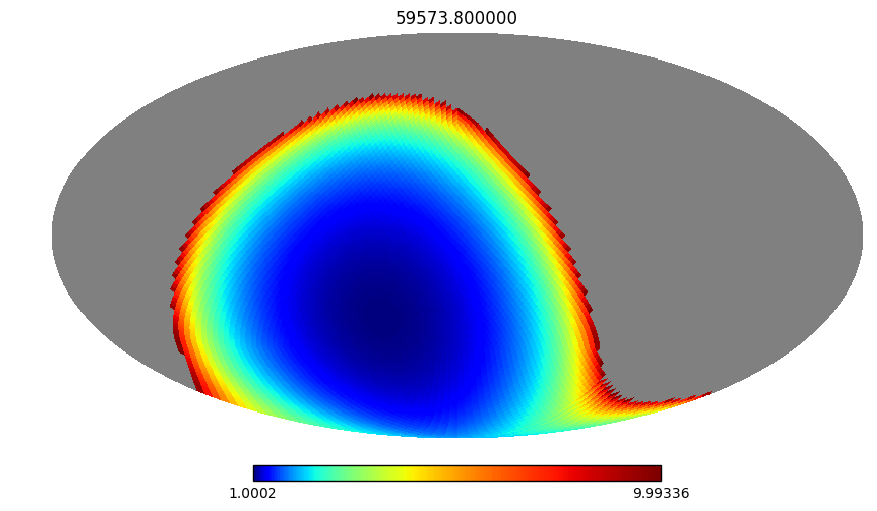

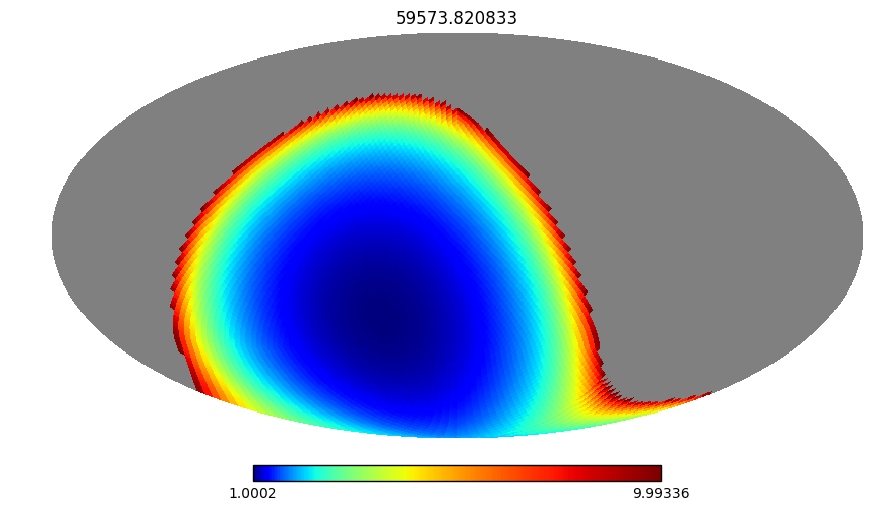

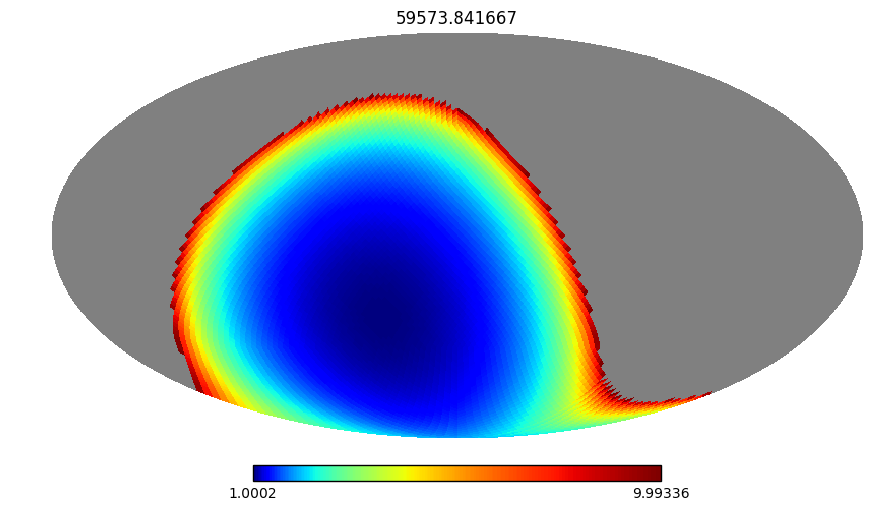

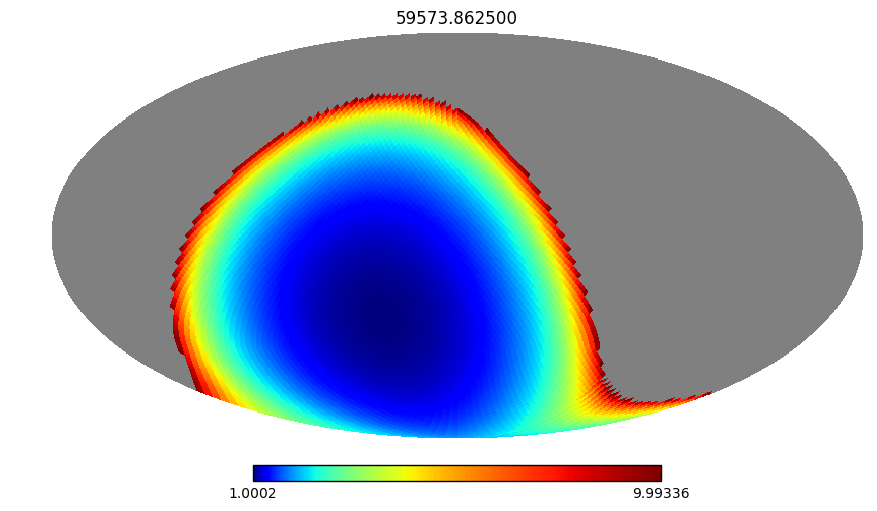

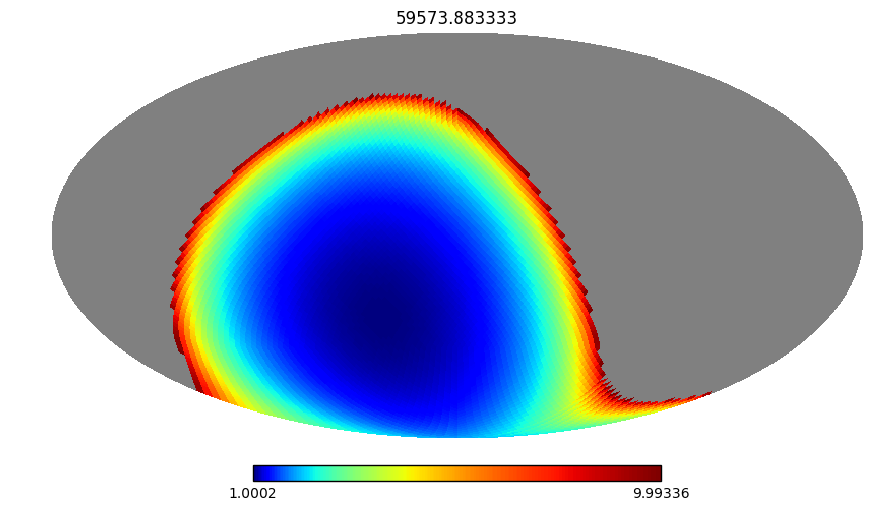

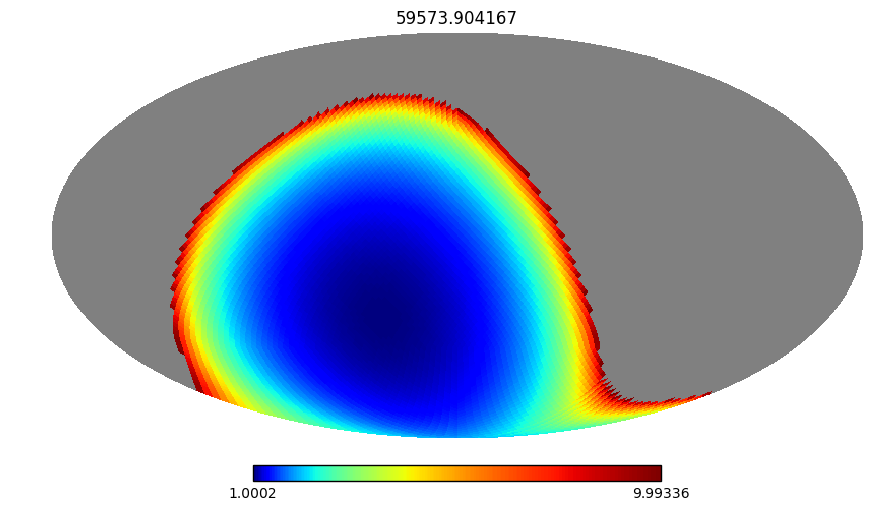

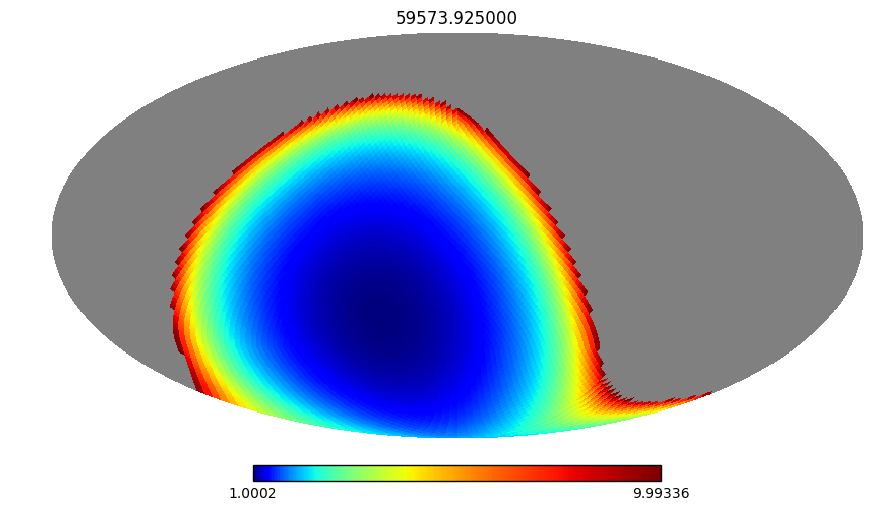

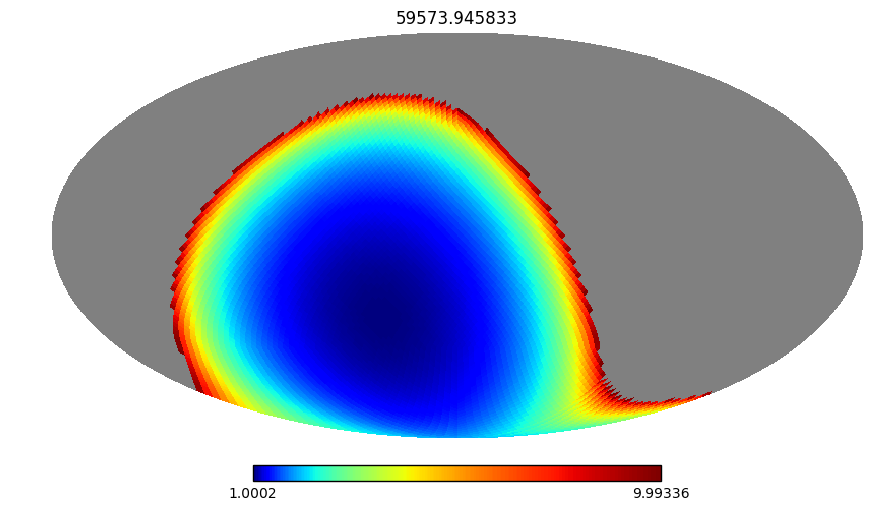

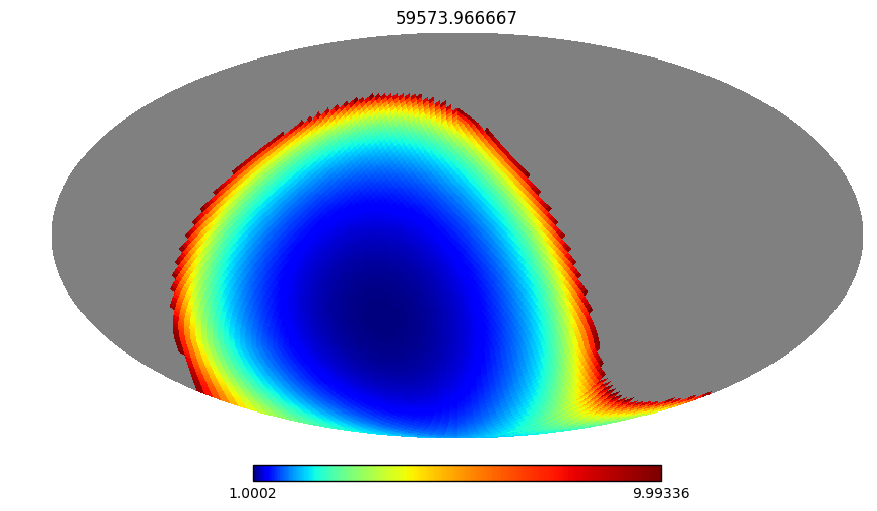

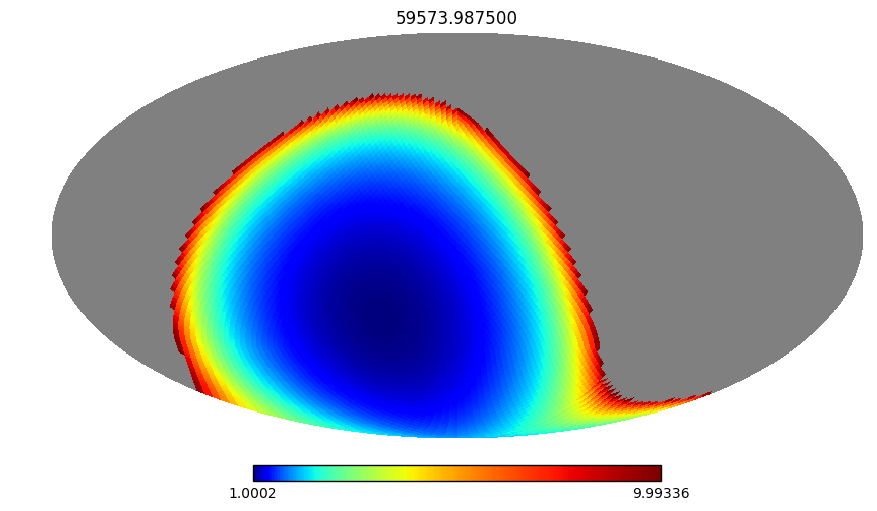

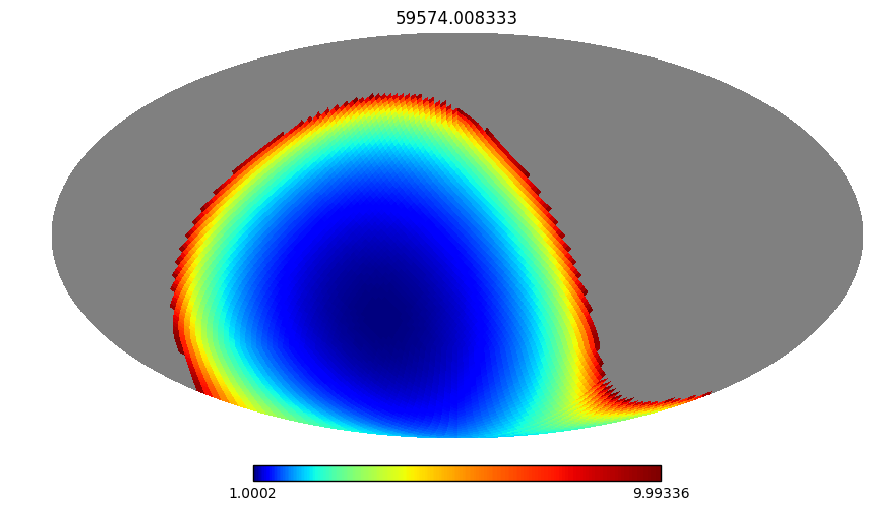

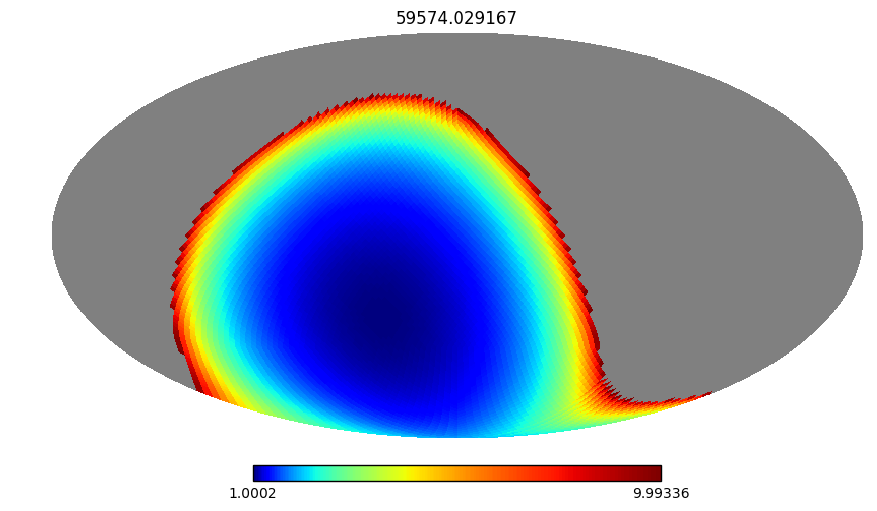

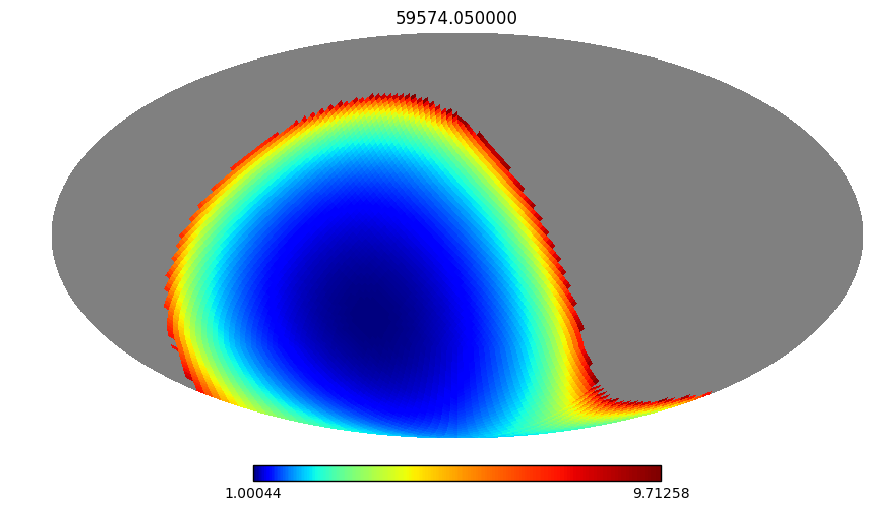

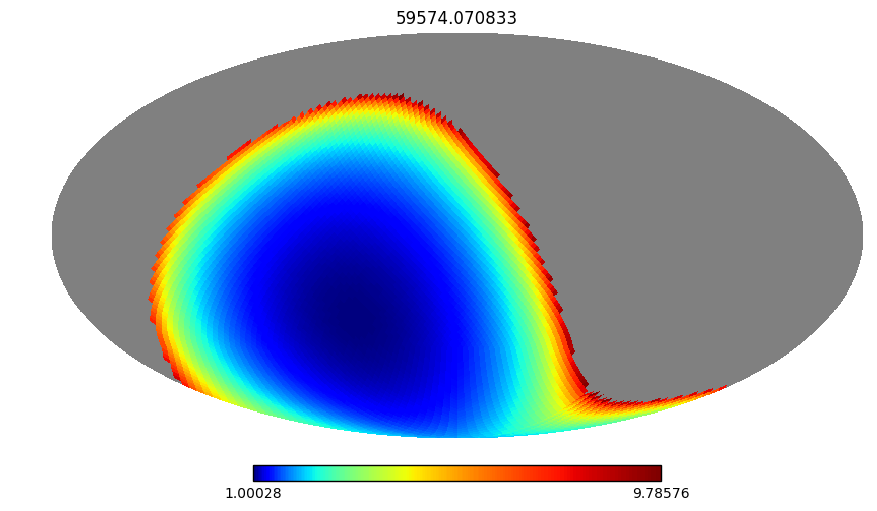

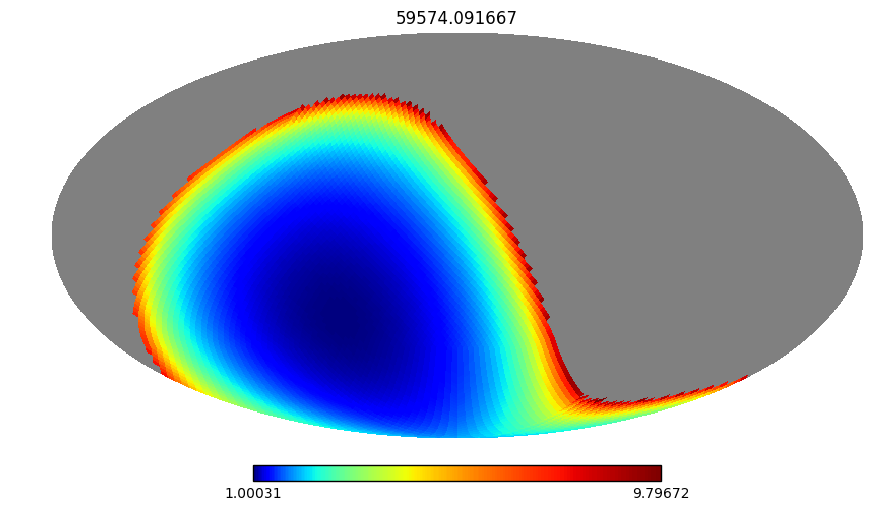

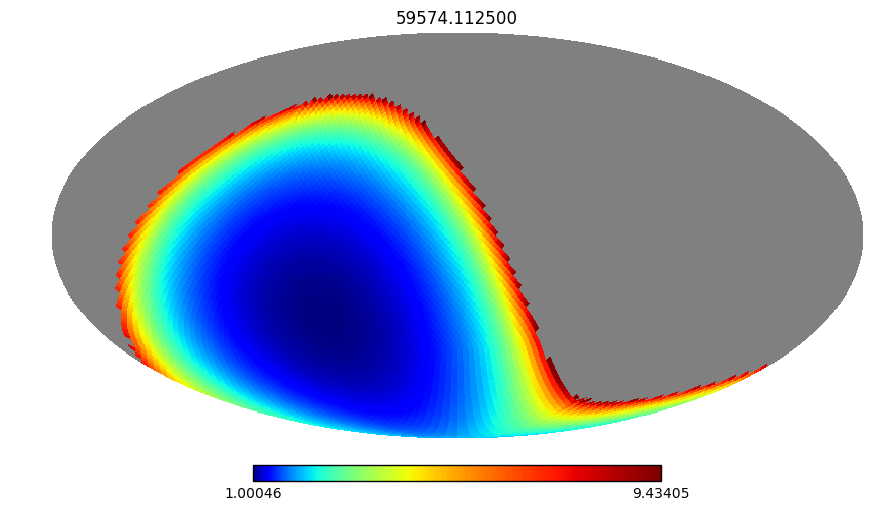

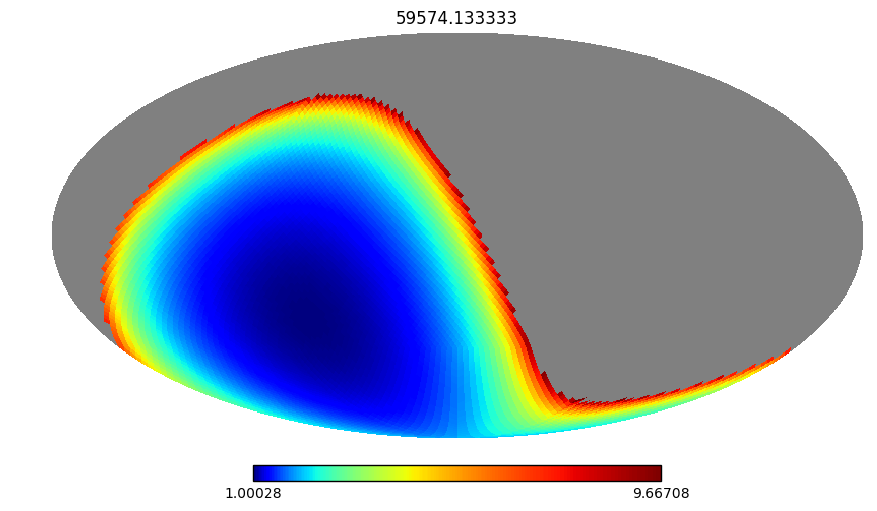

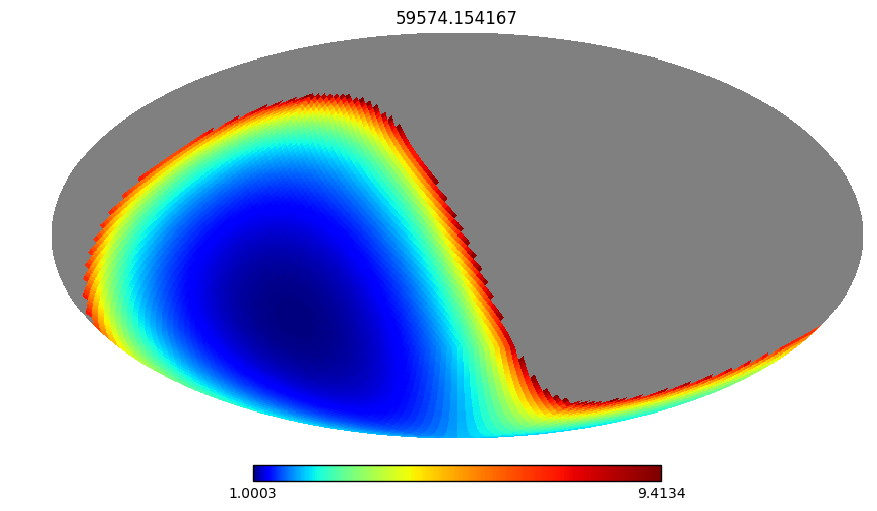

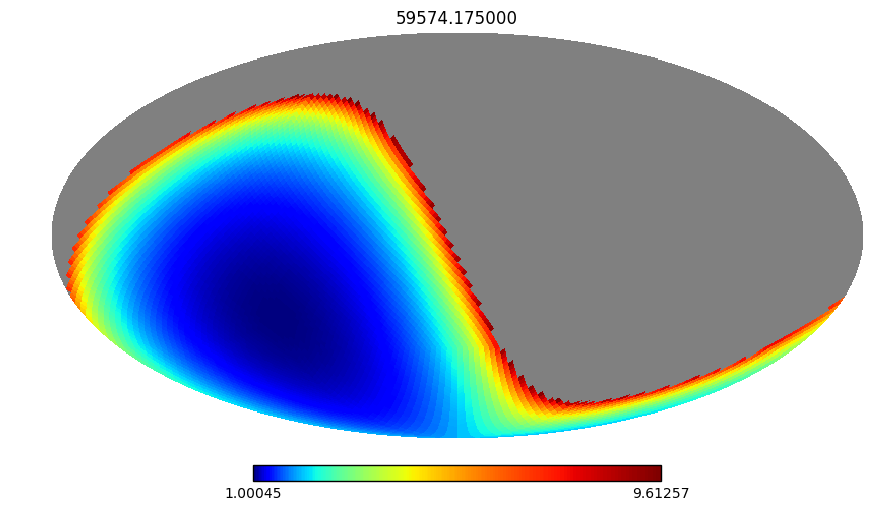

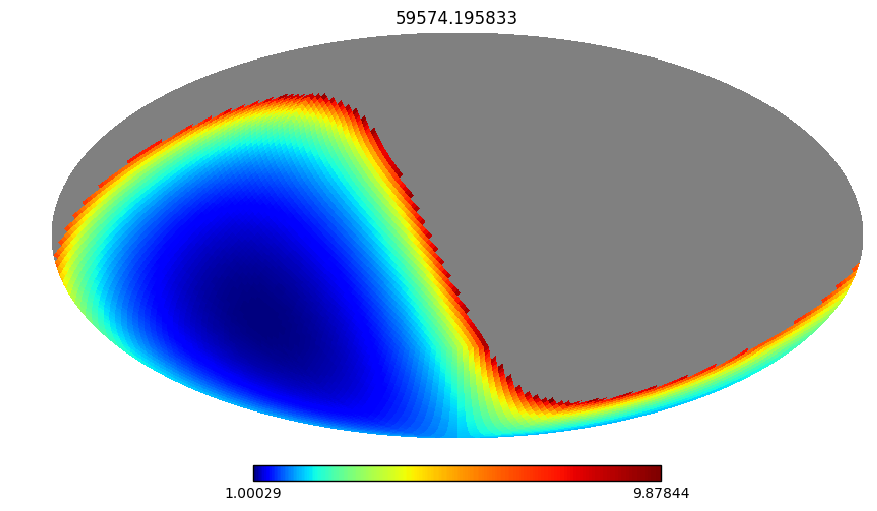

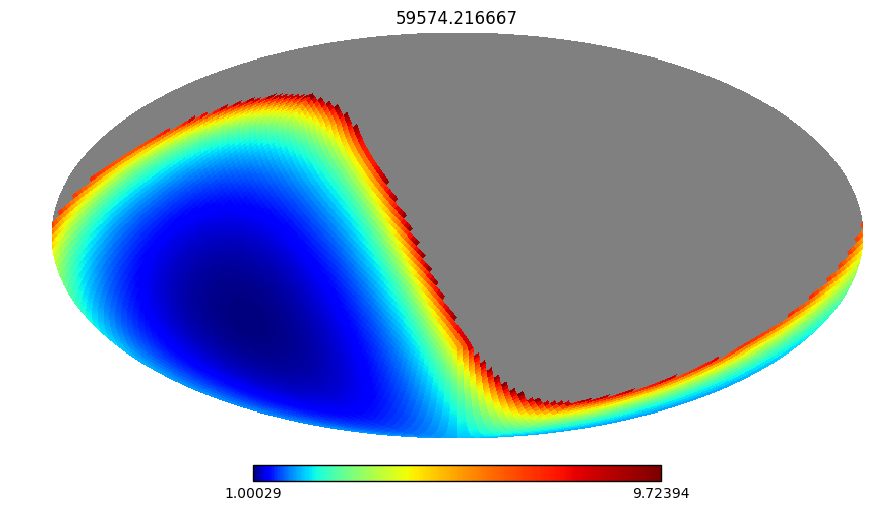

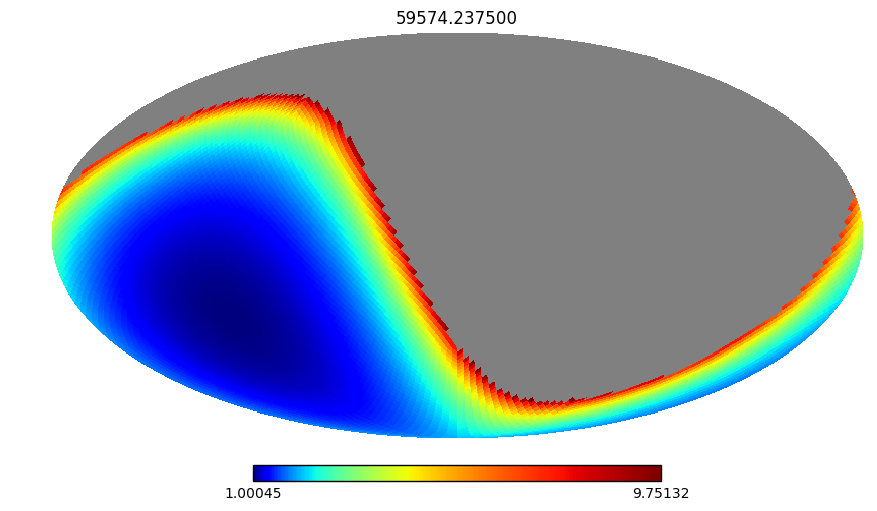

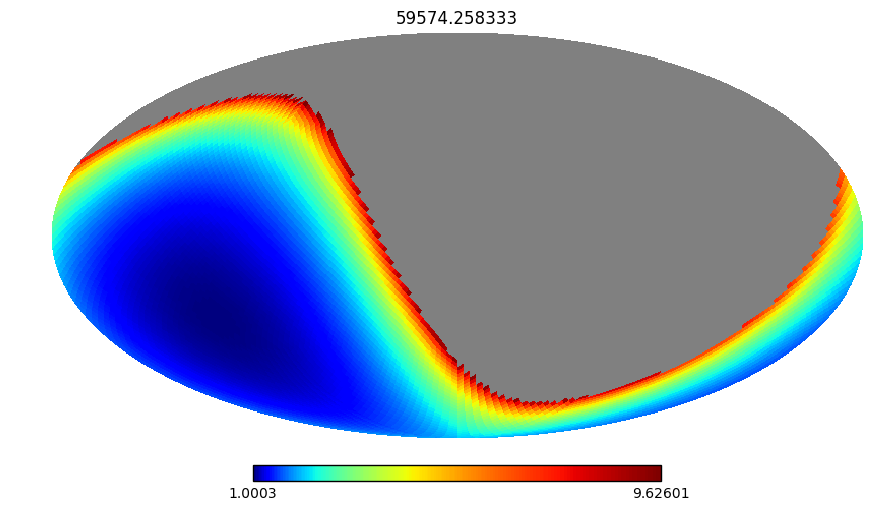

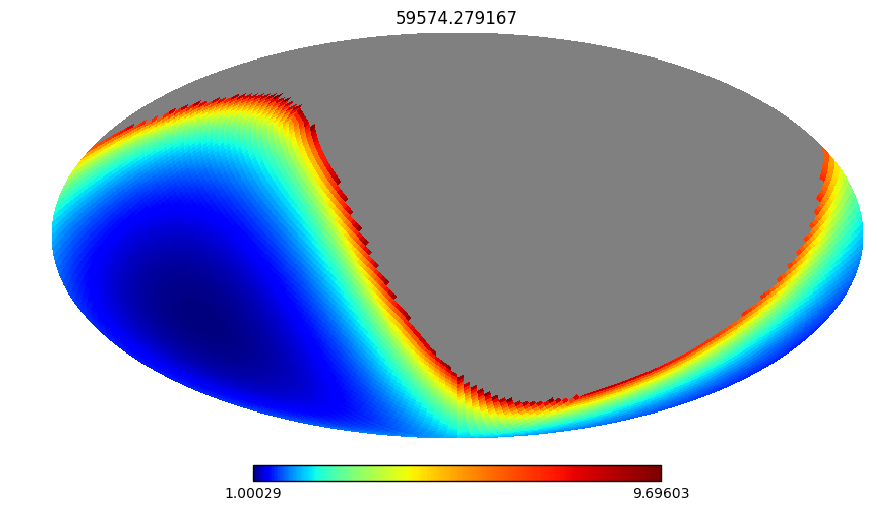

In [6]:
for mjd in mjds:
    am_map = sm.returnAirmass(mjd)
    if np.max(am_map) != hp.UNSEEN:
        hp.mollview(am_map, title='%f' % mjd, norm='log')

In [7]:
True in np.isinf(sm.sb['g'])

False

If one wanted to use OpSim field IDs instead

In [8]:
sm = sb.SkyModelPre(opsimFields=True)

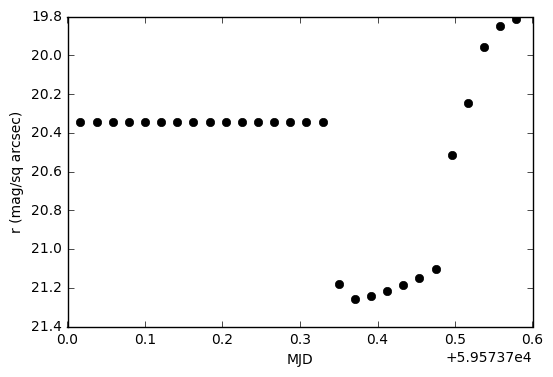

In [9]:
point_mags=[]
for mjd in mjds:
    point_mags.append(sm.returnMags(mjd, indx=[500])['r'])
point_mags = np.array(point_mags)
good = np.where(point_mags != hp.UNSEEN)[0]
plt.plot(mjds[good], point_mags[good], 'ko')
plt.xlabel('MJD')
plt.ylabel('r (mag/sq arcsec)')
plt.gca().invert_yaxis()